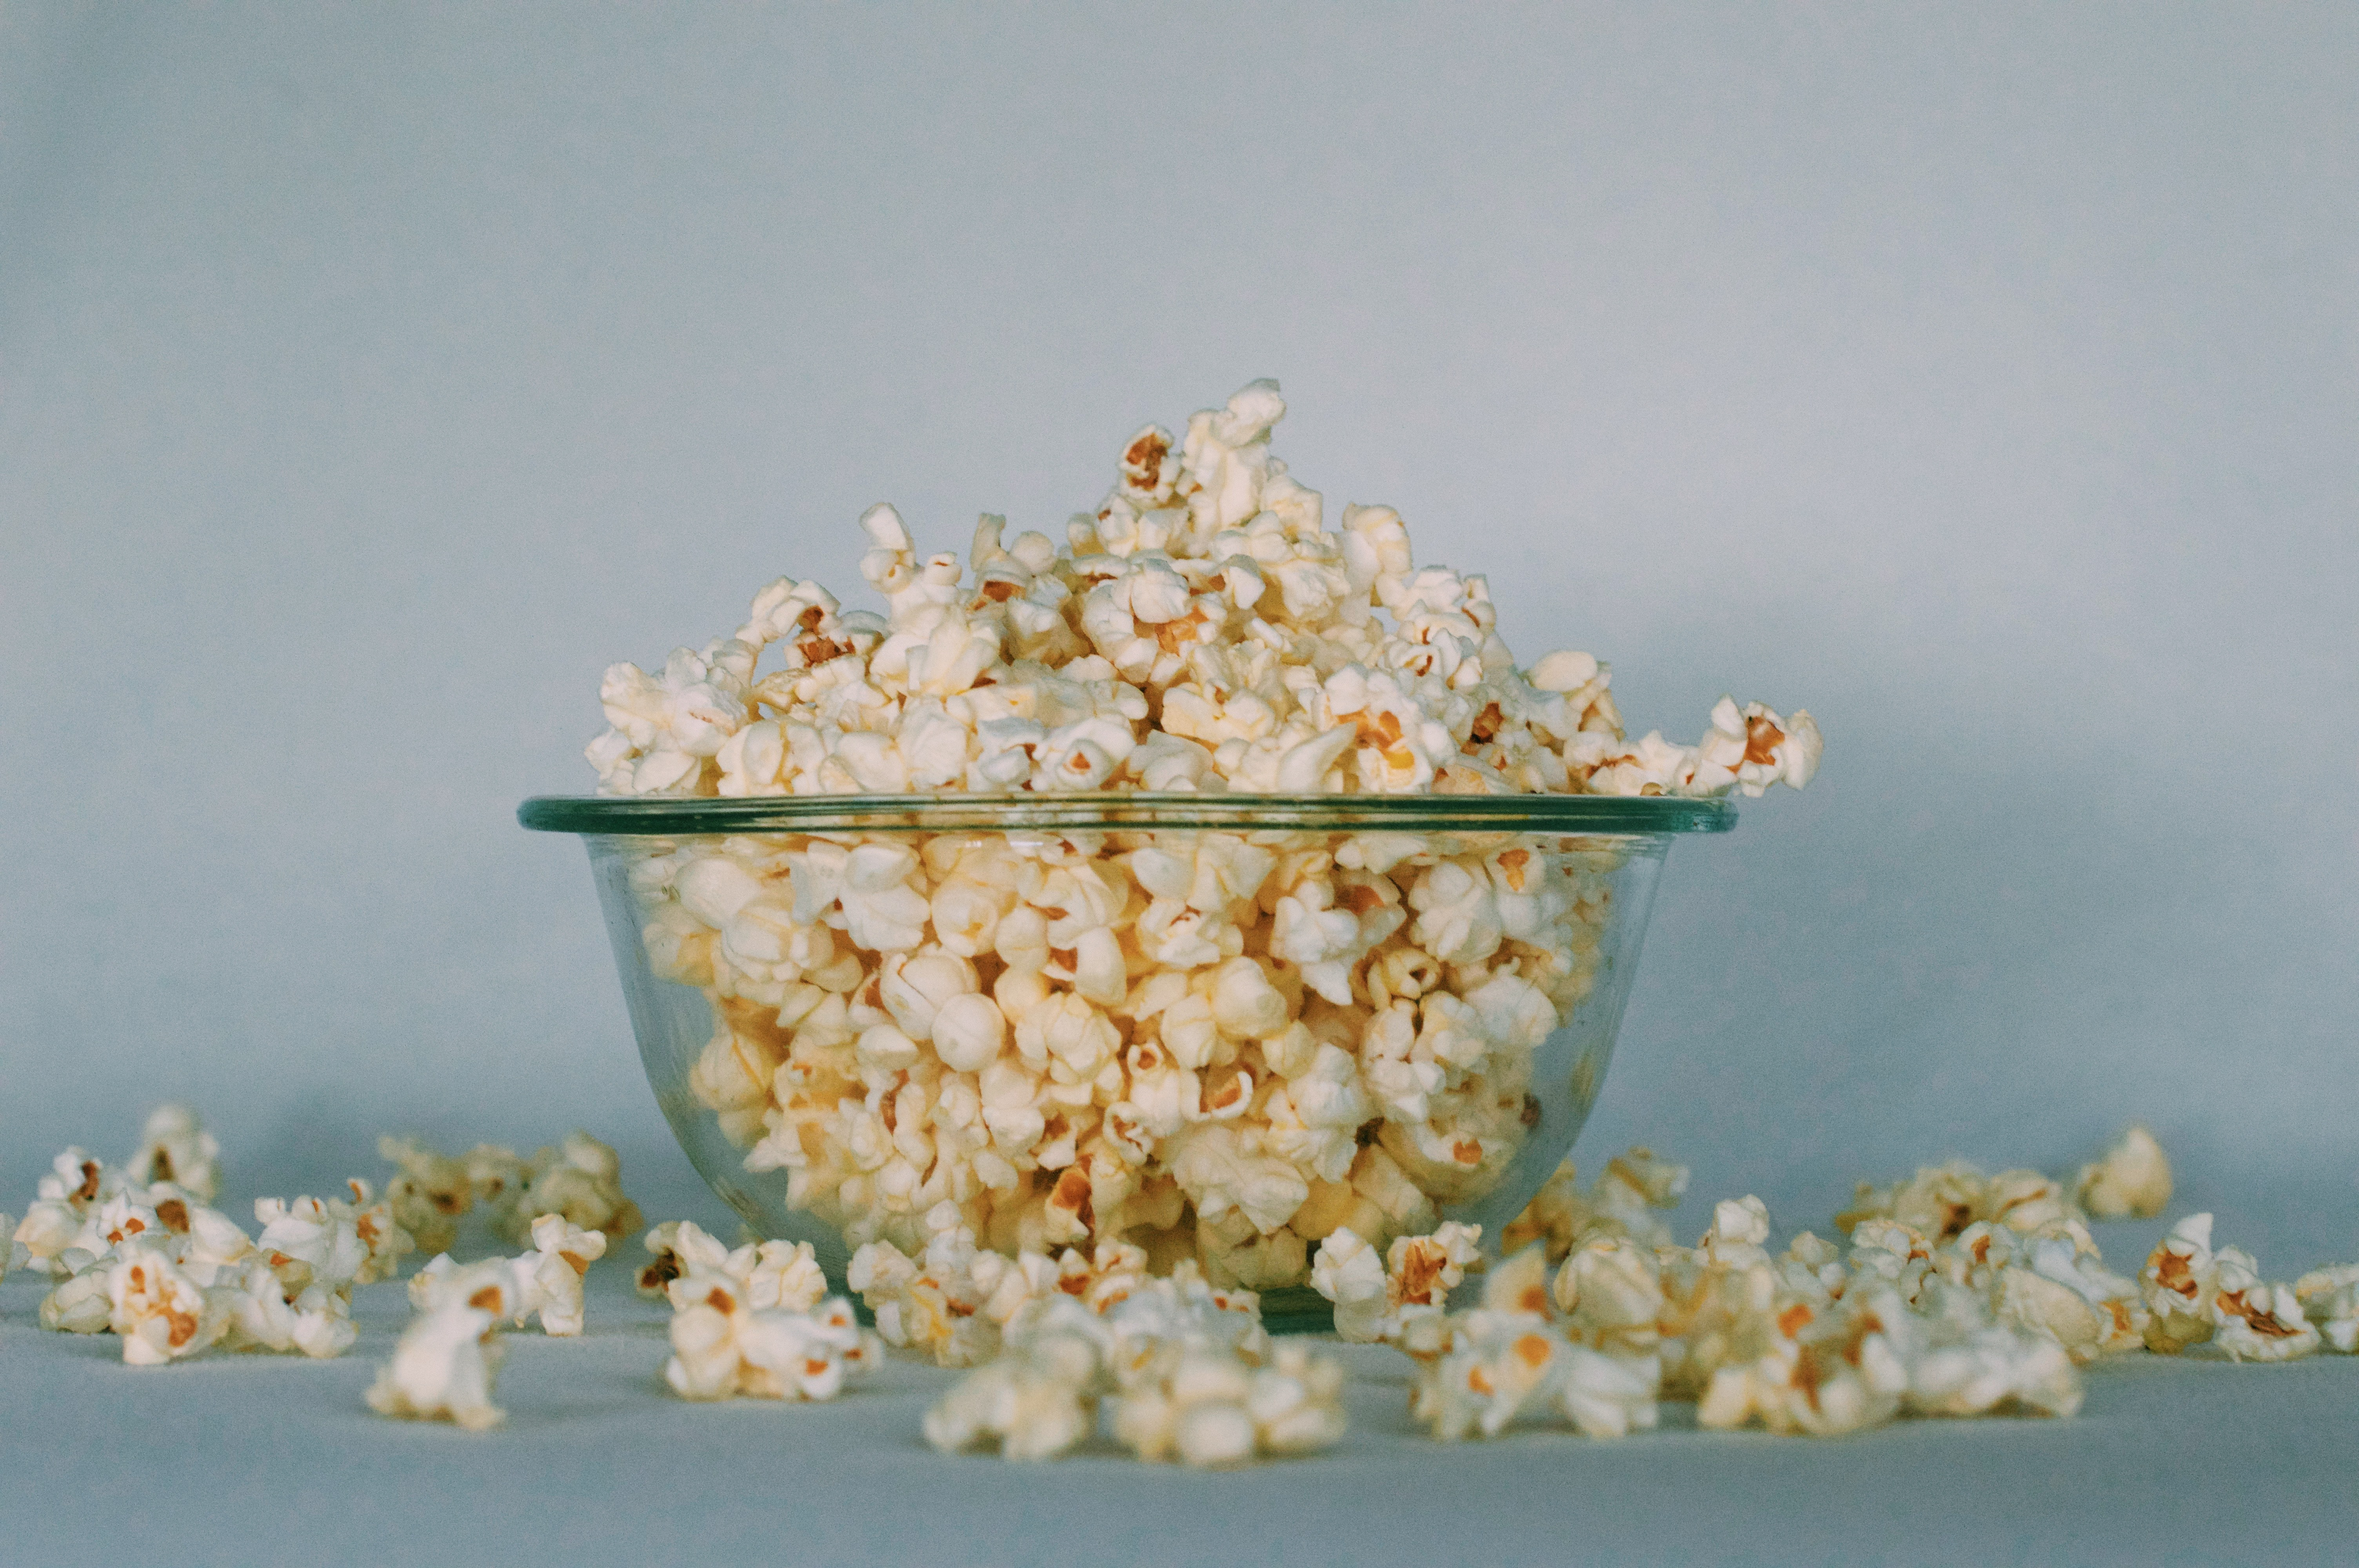

# Current Movie Industry Analysis
## Author: Diane Tunnicliffe

## Overview

I have been tasked with assisting Microsoft in their venture into the movie industry. My goal is to explore what type of films are currently doing the best at the box office and to provide these findings to Microsoft's new movie studio executives. My analysis of the movie industry, achieved by garnering data and utilizing descriptive statistics and visualizations, has shown that a larger budget is correlated with a higher box office gross. By using the maximum available funds to create either an animated musical movie released in November or an animated/live action super hero movie released in April or May, the data shows that a movie studio will be extremely likely to succeed. I have also given recommendations as to which composers should be hired for an animated musical movie, and which directors should be hired for a super hero movie.  Microsoft can use this report to target their production budget, genre, creative type, production method, and release-time of their upcoming movie endeavors to generate the highest amount of revenue possible. 

## Business Problem

I have been informed that Microsoft wants a piece of the multi-billion dollar movie-making industry, but that they are unsure of where to begin. The challenge for their new movie studio is that they are ready to jump into the industry but do not have the necessary knowledge to move forward. To assist them with this goal, I have been looking at the movies that performed highest in worldwide box office amounts for the past ten years. By analyzing the movies that have been most successful recently, I can make recommendations about attributes that Microsoft's movies should have in order to achieve the highest revenue. I have based my analysis on four main factors:
* Movie Type (Genre/Creative Type/Production Method): What types of movie content are currently most successful?
* Release Month: When is the most lucrative time of year to release a movie?
* Production Budget: What budget amount tends to achieve the highest box office gross?
* Additional Attributes: Based on these findings, what else do top-grossing movies have in common?

I chose these questions after considering the business problem and combing through the data I obtained. I have determined that the answers to these questions are integral to the steps that should be taken when considering how to produce the most profitable movie in today's world.

## Data Understanding

I utilized three different data sources for my analysis in order to have the most comprehensive view of the industry as it currently is. 
* OpusData Movie Data: a free dataset available upon request for academic research, comprised of 1,900 movies with a production year from 2006 to 2018, with a production budget greater than or equal to ten million dollars. This dataset contains values for movie name, production budget, domestic and international gross, genre, production method, runtime, and movie board rating. 
* Web-scraped data from The-Numbers.com: The Numbers is described as "the premier provider of movie industry data and research services". This website contains domestic, international, and worldwide box office revenue amounts per movie, and allows filtering and ordering of results based on many different criteria. Some of the criteria provided on this site that I found especially useful were the same criteria listed above: title, production budget, domestic and international gross, genre, and production method, in addition to release date and worldwide gross. For the purposes of this project, I generated and scraped reports for the top 100 movies per year, in terms of revenue, from 2010 to 2020.
* The Movie Database (TMDb) API: The Movie Database is a popular database for movies and TV shows. Their API is a system made freely available for data acquisition. There is a very large amount of data available on TMDb; for the purposes of this project, I used it mainly to fill in missing information from my other two datasets as I moved through my analysis. 

In [1478]:
# importing the packages I will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

%matplotlib inline

In [1479]:
# reading the csv file
opus_df = pd.read_csv('/Users/dtunnicliffe/Downloads/MovieData.csv')
# previewing the DataFrame
opus_df.head()

movie_name  production_year  movie_odid  production_budget  \
0    Madea's Family Reunion             2006     8220100           10000000   
1                    Krrish             2006    58540100           10000000   
2          End of the Spear             2006    34620100           10000000   
3  A Prairie Home Companion             2006    24910100           10000000   
4                   Saw III             2006     5840100           10000000   

   domestic_box_office  international_box_office     rating  \
0             63257940                     62581      PG-13   
1              1430721                  31000000  Not Rated   
2             11748661                    175380      PG-13   
3             20342852                   6373339      PG-13   
4             80238724                  83638091          R   

          creative_type               source production_method   genre  \
0  Contemporary Fiction        Based on Play       Live Action  Comedy   
1       Science Fiction  Original Screenplay       Live Action  Action   
2    Historical Fiction  Original Screenplay       Live Action   Drama   
3  Contemporary Fiction  Original Screenplay       Live Action  Comedy   
4  Contemporary Fiction  Original Screenplay       Live Action  Horror   

   sequel  running_time  
0    1.00           nan  
1    1.00           nan  
2    0.00           nan  
3    0.00        105.00  
4    1.00           nan

In [1480]:
# getting info for DataFrame
opus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 13 columns):
movie_name                  1936 non-null object
production_year             1936 non-null int64
movie_odid                  1936 non-null int64
production_budget           1936 non-null int64
domestic_box_office         1936 non-null int64
international_box_office    1936 non-null int64
rating                      1913 non-null object
creative_type               1923 non-null object
source                      1915 non-null object
production_method           1925 non-null object
genre                       1926 non-null object
sequel                      1934 non-null float64
running_time                1822 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 196.8+ KB


In [1481]:
# getting counts for each value in genre column
opus_df['genre'].value_counts()

Drama                  471
Adventure              334
Comedy                 318
Action                 311
Thriller/Suspense      231
Horror                 104
Romantic Comedy         82
Musical                 25
Black Comedy            24
Western                 15
Concert/Performance      6
Documentary              5
Name: genre, dtype: int64

In [1482]:
# generating descriptive statistics for domestic box office values
opus_df['domestic_box_office'].describe()

count        1936.00
mean     64329960.75
std      87724369.60
min             0.00
25%      11003050.25
50%      36329945.00
75%      80069777.50
max     936662225.00
Name: domestic_box_office, dtype: float64

In [1483]:
# generating descriptive statistics for production budget values
opus_df['production_budget'].describe()

count        1936.00
mean     53428574.38
std      53685623.15
min      10000000.00
25%      19000000.00
50%      32750000.00
75%      65000000.00
max     425000000.00
Name: production_budget, dtype: float64

### The-Numbers Web Scraping
#### 2010
My first step was to obtain data for the top 100 grossing movies of 2010. I did this by building a report on The-Numbers.com, scraping this data, and reading it into a pandas DataFrame.

In [1484]:
# url for the full customized report of top 100 movies for 2010
url = f"https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/2010/2010/None/None/None/None/None/None?show-release-date=On&view-order-by=domestic-box-office&show-release-year=On&view-order-direction=desc&show-production-budget=On&show-domestic-box-office=On&show-international-box-office=On&show-worldwide-box-office=On&show-genre=On&show-production-method=On&show-creative-type=On"
response = requests.get(url)
# creating soup
soup = BeautifulSoup(response.text, 'lxml')
# finding table containing report info
table = soup.find('table')
# converting html of table into a string 
table_string = f"""{table}"""
# reading html string into pandas
table_read = pd.read_html(table_string)
# converting into DataFrame
numbers_2010 = table_read[0]
# previewing DataFrame
numbers_2010.head()

Unnamed: 0      Released  Released.1  \
0           1  Jun 18, 2010        2010   
1           2   Mar 5, 2010        2010   
2           3   May 7, 2010        2010   
3           4  Jun 30, 2010        2010   
4           5  Nov 19, 2010        2010   

                                    Title      Genre       ProductionMethod  \
0                             Toy Story 3  Adventure      Digital Animation   
1                     Alice in Wonderland  Adventure  Animation/Live Action   
2                              Iron Man 2     Action            Live Action   
3              The Twilight Saga: Eclipse      Drama            Live Action   
4  Harry Potter and the Deathly Hallows:…  Adventure  Animation/Live Action   

   CreativeType ProductionBudget DomesticBox Office InternationalBox Office  \
0  Kids Fiction     $200,000,000       $415,004,880            $653,874,642   
1       Fantasy     $200,000,000       $334,191,110            $691,300,000   
2    Super Hero     $170,000,000       $312,433,331            $308,723,058   
3       Fantasy      $68,000,000       $300,531,751            $405,571,077   
4       Fantasy     $125,000,000       $296,131,568            $661,099,825   

  WorldwideBox Office  
0      $1,068,879,522  
1      $1,025,491,110  
2        $621,156,389  
3        $706,102,828  
4        $957,231,393

Now that I had a DataFrame to work with, I was able to start running some summary statistics and exploring the data.

In [1485]:
# getting info for DataFrame
numbers_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
Unnamed: 0                 100 non-null int64
Released                   100 non-null object
Released.1                 100 non-null int64
Title                      100 non-null object
Genre                      100 non-null object
ProductionMethod           100 non-null object
CreativeType               100 non-null object
ProductionBudget           100 non-null object
DomesticBox Office         100 non-null object
InternationalBox Office    100 non-null object
WorldwideBox Office        100 non-null object
dtypes: int64(2), object(9)
memory usage: 8.7+ KB


In [1486]:
# getting descriptive statistics for DataFrame
numbers_2010.describe()

Unnamed: 0  Released.1
count      100.00      100.00
mean        50.50     2010.00
std         29.01        0.00
min          1.00     2010.00
25%         25.75     2010.00
50%         50.50     2010.00
75%         75.25     2010.00
max        100.00     2010.00

In [1487]:
# retrieving data type for domestic box office column values
numbers_2010['DomesticBox Office'].dtype

dtype('O')

I noted that the describe method for this DataFrame was not very helpful at this point because my dollar amounts for domestic, international, and worldwide gross were pulled as objects (not floats or integers). I knew that would require further adjusting in the next stage.

In [1488]:
# getting value counts for genre column
numbers_2010.Genre.value_counts()

Adventure            21
Drama                18
Comedy               16
Action               13
Thriller/Suspense    11
Horror                9
Romantic Comedy       8
Western               1
Musical               1
Documentary           1
Black Comedy          1
Name: Genre, dtype: int64

Adventure and Drama were the most common movie genres for top grossing movies in 2010.

In [1489]:
# getting value counts for production method column
numbers_2010['ProductionMethod'].value_counts()

Live Action              85
Animation/Live Action     8
Digital Animation         7
Name: ProductionMethod, dtype: int64

For 2010 production methods, Live Action was by far the most common, with 85% of the top grossing movies being of this type.

In [1490]:
# getting value counts for creative type column
numbers_2010['CreativeType'].value_counts()

Contemporary Fiction    56
Fantasy                 14
Kids Fiction            10
Science Fiction          7
Historical Fiction       5
Dramatization            5
Factual                  2
Super Hero               1
Name: CreativeType, dtype: int64

Contemporary Fiction was the most common creative type by far for the top movies made in 2010.

#### 2011
Since I knew I'd be scraping data for each year in the exact same way as above, I created a function to speed up the process.

In [1491]:
def number_scraper(year):
    """ 
    Scrapes 100 top-grossing movies from The-Numbers.com. 
  
    Adds year input to url and scrapes resulting table. 
  
    Parameters: 
    year (int): user input 4-digit year for movie gross to be scraped.
  
    Returns: 
    numbers_df (Pandas DataFrame): A dataframe populated with movie gross table values. 
  
    """
    # url for the full customized report of top 100 movies for release years in range listed
    url = f"https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/{year}/{year}/None/None/None/None/None/None?show-release-date=On&view-order-by=domestic-box-office&show-release-year=On&view-order-direction=desc&show-production-budget=On&show-domestic-box-office=On&show-international-box-office=On&show-worldwide-box-office=On&show-genre=On&show-production-method=On&show-creative-type=On"
    response = requests.get(url)
    # creating soup
    soup = BeautifulSoup(response.text, 'lxml')
    # finding table
    table = soup.find('table')
    # converting html of table into string 
    table_string = f"""{table}"""
    # reading html string into pandas
    table_read = pd.read_html(table_string)
    # converting into DataFrame
    numbers_df = table_read[0]
    return numbers_df

In [1515]:
# scraping 2011 data and compiling into DataFrame
numbers_2011 = number_scraper(2011)
#previewing DataFrame
numbers_2011.head()

Unnamed: 0      Released  Released.1  \
0           1  Jul 15, 2011        2011   
1           2  Jun 29, 2011        2011   
2           3  Nov 18, 2011        2011   
3           4  May 26, 2011        2011   
4           5  May 20, 2011        2011   

                                      Title      Genre       ProductionMethod  \
0    Harry Potter and the Deathly Hallows:…  Adventure  Animation/Live Action   
1            Transformers: Dark of the Moon     Action  Animation/Live Action   
2  The Twilight Saga: Breaking Dawn, Part 1      Drama            Live Action   
3                      The Hangover Part II     Comedy            Live Action   
4    Pirates of the Caribbean: On Stranger…  Adventure            Live Action   

           CreativeType ProductionBudget DomesticBox Office  \
0               Fantasy     $125,000,000       $381,193,157   
1       Science Fiction     $195,000,000       $352,390,543   
2               Fantasy     $127,500,000       $281,287,133   
3  Contemporary Fiction      $80,000,000       $254,464,305   
4               Fantasy     $379,000,000       $241,063,875   

  InternationalBox Office WorldwideBox Office  
0            $953,964,334      $1,335,157,491  
1            $771,403,536      $1,123,794,079  
2            $408,132,918        $689,420,051  
3            $332,000,000        $586,464,305  
4            $804,600,000      $1,045,663,875

In [1493]:
# scraping 2012 data and compiling into DataFrame
numbers_2012 = number_scraper(2012)
# previewing DataFrame
numbers_2012.head()

Unnamed: 0      Released  Released.1                              Title  \
0           1   May 4, 2012        2012                       The Avengers   
1           2  Jul 20, 2012        2012              The Dark Knight Rises   
2           3  Mar 23, 2012        2012                   The Hunger Games   
3           4   Nov 8, 2012        2012                            Skyfall   
4           5  Dec 14, 2012        2012  The Hobbit: An Unexpected Journey   

               Genre       ProductionMethod          CreativeType  \
0             Action  Animation/Live Action            Super Hero   
1             Action            Live Action            Super Hero   
2  Thriller/Suspense            Live Action       Science Fiction   
3             Action            Live Action  Contemporary Fiction   
4          Adventure  Animation/Live Action               Fantasy   

  ProductionBudget DomesticBox Office InternationalBox Office  \
0     $225,000,000       $623,357,910            $891,742,301   
1     $230,000,000       $448,139,099            $634,089,008   
2      $80,000,000       $408,010,692            $269,912,687   
3     $200,000,000       $304,360,277            $806,166,704   
4     $200,000,000       $303,003,568            $714,000,000   

  WorldwideBox Office  
0      $1,515,100,211  
1      $1,082,228,107  
2        $677,923,379  
3      $1,110,526,981  
4      $1,017,003,568

In [1494]:
# scraping 2013 data and compiling into DataFrame
numbers_2013 = number_scraper(2013)
# previewing DataFrame
numbers_2013.head()

Unnamed: 0      Released  Released.1                            Title  \
0           1  Nov 22, 2013        2013  The Hunger Games: Catching Fire   
1           2   May 3, 2013        2013                       Iron Man 3   
2           3  Nov 22, 2013        2013                           Frozen   
3           4   Jul 3, 2013        2013                  Despicable Me 2   
4           5  Jun 14, 2013        2013                     Man of Steel   

       Genre       ProductionMethod     CreativeType ProductionBudget  \
0  Adventure            Live Action  Science Fiction     $130,000,000   
1     Action  Animation/Live Action       Super Hero     $200,000,000   
2    Musical      Digital Animation     Kids Fiction     $150,000,000   
3  Adventure      Digital Animation     Kids Fiction      $76,000,000   
4     Action            Live Action       Super Hero     $225,000,000   

  DomesticBox Office InternationalBox Office WorldwideBox Office  
0       $424,668,047            $440,200,000        $864,868,047  
1       $408,992,272            $806,400,000      $1,215,392,272  
2       $400,738,009            $867,336,243      $1,268,074,252  
3       $368,065,385            $607,151,450        $975,216,835  
4       $291,045,518            $376,954,000        $667,999,518

In [1495]:
# scraping 2014 data and compiling into DataFrame
numbers_2014 = number_scraper(2014)
# previewing DataFrame
numbers_2014.head()

Unnamed: 0      Released  Released.1  \
0           1  Dec 25, 2014        2014   
1           2  Nov 21, 2014        2014   
2           3   Aug 1, 2014        2014   
3           4   Apr 4, 2014        2014   
4           5   Feb 7, 2014        2014   

                                   Title              Genre  \
0                        American Sniper              Drama   
1  The Hunger Games: Mockingjay - Part 1  Thriller/Suspense   
2                Guardians of the Galaxy             Action   
3    Captain America: The Winter Soldier             Action   
4                         The Lego Movie          Adventure   

        ProductionMethod     CreativeType ProductionBudget DomesticBox Office  \
0            Live Action    Dramatization      $58,000,000       $350,126,372   
1            Live Action  Science Fiction     $125,000,000       $337,135,885   
2  Animation/Live Action       Super Hero     $170,000,000       $333,172,112   
3            Live Action       Super Hero     $170,000,000       $259,746,958   
4      Digital Animation     Kids Fiction      $60,000,000       $257,784,718   

  InternationalBox Office WorldwideBox Office  
0            $197,200,000        $547,326,372  
1            $429,439,246        $766,575,131  
2            $437,664,966        $770,837,078  
3            $454,654,931        $714,401,889  
4            $210,300,000        $468,084,718

In [1496]:
# scraping 2015 data and compiling into DataFrame
numbers_2015 = number_scraper(2015)
# previewing DataFrame
numbers_2015.head()

Unnamed: 0      Released  Released.1                                 Title  \
0           1  Dec 18, 2015        2015  Star Wars Ep. VII: The Force Awakens   
1           2  Jun 12, 2015        2015                        Jurassic World   
2           3   May 1, 2015        2015               Avengers: Age of Ultron   
3           4  Jun 19, 2015        2015                            Inside Out   
4           5   Apr 3, 2015        2015                             Furious 7   

       Genre       ProductionMethod          CreativeType ProductionBudget  \
0  Adventure  Animation/Live Action       Science Fiction     $306,000,000   
1     Action            Live Action       Science Fiction     $215,000,000   
2     Action  Animation/Live Action            Super Hero     $365,000,000   
3  Adventure      Digital Animation          Kids Fiction     $175,000,000   
4     Action            Live Action  Contemporary Fiction     $190,000,000   

  DomesticBox Office InternationalBox Office WorldwideBox Office  
0       $936,662,225          $1,128,815,859      $2,065,478,084  
1       $652,270,625          $1,017,673,342      $1,669,943,967  
2       $459,005,868            $937,093,334      $1,396,099,202  
3       $356,461,711            $498,748,492        $855,210,203  
4       $353,007,020          $1,165,715,774      $1,518,722,794

In [1497]:
# scraping 2016 data and compiling into DataFrame
numbers_2016 = number_scraper(2016)
# previewing the DataFrame
numbers_2016.head()

Unnamed: 0      Released  Released.1                         Title  \
0           1  Dec 16, 2016        2016  Rogue One: A Star Wars Story   
1           2  Jun 17, 2016        2016                  Finding Dory   
2           3   May 6, 2016        2016    Captain America: Civil War   
3           4   Jul 8, 2016        2016       The Secret Life of Pets   
4           5  Apr 15, 2016        2016               The Jungle Book   

       Genre       ProductionMethod     CreativeType ProductionBudget  \
0  Adventure  Animation/Live Action  Science Fiction     $200,000,000   
1  Adventure      Digital Animation     Kids Fiction     $200,000,000   
2     Action            Live Action       Super Hero     $250,000,000   
3  Adventure      Digital Animation     Kids Fiction      $75,000,000   
4  Adventure  Animation/Live Action          Fantasy     $175,000,000   

  DomesticBox Office InternationalBox Office WorldwideBox Office  
0       $532,177,324            $523,879,949      $1,056,057,273  
1       $486,295,561            $538,710,564      $1,025,006,125  
2       $408,084,349            $743,834,172      $1,151,918,521  
3       $368,384,330            $518,222,082        $886,606,412  
4       $364,001,123            $596,070,697        $960,071,820

### 2017

In [1498]:
# scraping 2017 data and compiling into DataFrame
numbers_2017 = number_scraper(2017)
# previewing the DataFrame
numbers_2017.head()

Unnamed: 0      Released  Released.1                              Title  \
0           1  Dec 15, 2017        2017  Star Wars Ep. VIII: The Last Jedi   
1           2  Mar 17, 2017        2017               Beauty and the Beast   
2           3   Jun 2, 2017        2017                       Wonder Woman   
3           4  Dec 20, 2017        2017     Jumanji: Welcome to the Jungle   
4           5   May 5, 2017        2017      Guardians of the Galaxy Vol 2   

       Genre       ProductionMethod     CreativeType ProductionBudget  \
0  Adventure  Animation/Live Action  Science Fiction     $200,000,000   
1    Musical  Animation/Live Action          Fantasy     $160,000,000   
2     Action            Live Action       Super Hero     $150,000,000   
3  Adventure            Live Action  Science Fiction      $90,000,000   
4     Action  Animation/Live Action       Super Hero     $200,000,000   

  DomesticBox Office InternationalBox Office WorldwideBox Office  
0       $620,181,382            $712,358,507      $1,332,539,889  
1       $504,014,165            $752,128,924      $1,256,143,089  
2       $412,563,408            $406,229,647        $818,793,055  
3       $404,508,916            $556,721,277        $961,230,193  
4       $389,813,101            $479,300,000        $869,113,101

### 2018

In [1499]:
# scraping 2018 data and compiling into DataFrame
numbers_2018 = number_scraper(2018)
# previewing the DataFrame
numbers_2018.head()

Unnamed: 0      Released  Released.1                           Title  \
0           1  Feb 16, 2018        2018                   Black Panther   
1           2  Apr 27, 2018        2018          Avengers: Infinity War   
2           3  Jun 15, 2018        2018                   Incredibles 2   
3           4  Jun 22, 2018        2018  Jurassic World: Fallen Kingdom   
4           5  Dec 21, 2018        2018                         Aquaman   

       Genre       ProductionMethod     CreativeType ProductionBudget  \
0     Action            Live Action       Super Hero     $200,000,000   
1     Action  Animation/Live Action       Super Hero     $300,000,000   
2  Adventure      Digital Animation     Kids Fiction     $200,000,000   
3     Action            Live Action  Science Fiction     $170,000,000   
4     Action  Animation/Live Action       Super Hero     $160,000,000   

  DomesticBox Office InternationalBox Office WorldwideBox Office  
0       $700,059,566            $639,674,336      $1,339,733,902  
1       $678,815,482          $1,365,725,041      $2,044,540,523  
2       $608,581,744            $634,223,615      $1,242,805,359  
3       $417,719,760            $890,614,245      $1,308,334,005  
4       $335,061,807            $808,904,713      $1,143,966,520

### 2019

In [1500]:
# scraping 2019 data and compiling into DataFrame
numbers_2019 = number_scraper(2019)
# previewing the DataFrame
numbers_2019.head()

Unnamed: 0      Released  Released.1                             Title  \
0           1  Apr 26, 2019        2019                 Avengers: Endgame   
1           2  Jul 19, 2019        2019                     The Lion King   
2           3  Dec 20, 2019        2019  Star Wars: The Rise of Skywalker   
3           4  Nov 22, 2019        2019                         Frozen II   
4           5  Jun 21, 2019        2019                       Toy Story 4   

       Genre       ProductionMethod     CreativeType ProductionBudget  \
0     Action  Animation/Live Action       Super Hero     $400,000,000   
1  Adventure  Animation/Live Action     Kids Fiction     $260,000,000   
2  Adventure  Animation/Live Action  Science Fiction     $275,000,000   
3  Adventure      Digital Animation     Kids Fiction     $150,000,000   
4  Adventure      Digital Animation     Kids Fiction     $200,000,000   

  DomesticBox Office InternationalBox Office WorldwideBox Office  
0       $858,373,000          $1,939,427,564      $2,797,800,564  
1       $543,638,043          $1,112,503,536      $1,656,141,579  
2       $515,202,542            $557,741,680      $1,072,944,222  
3       $477,373,578            $969,892,165      $1,447,265,743  
4       $434,038,008            $639,356,805      $1,073,394,813

### 2020

In [1501]:
# scraping 2020 data and compiling into DataFrame
numbers_2020 = number_scraper(2020)
# previewing the DataFrame
numbers_2020.head()

Unnamed: 0      Released  Released.1  \
0           1  Jan 17, 2020        2020   
1           2  Feb 14, 2020        2020   
2           3   Feb 7, 2020        2020   
3           4  Jan 17, 2020        2020   
4           5  Feb 28, 2020        2020   

                                    Title      Genre       ProductionMethod  \
0                       Bad Boys For Life     Action            Live Action   
1                      Sonic The Hedgehog  Adventure  Animation/Live Action   
2  Birds of Prey (And the Fantabulous Em…     Action            Live Action   
3                                Dolittle  Adventure  Animation/Live Action   
4                       The Invisible Man     Horror            Live Action   

           CreativeType ProductionBudget DomesticBox Office  \
0  Contemporary Fiction      $90,000,000       $204,417,855   
1          Kids Fiction      $90,000,000       $146,066,470   
2            Super Hero      $82,000,000        $84,158,461   
3               Fantasy     $175,000,000        $77,047,065   
4       Science Fiction       $7,000,000        $64,914,050   

  InternationalBox Office WorldwideBox Office  
0            $220,108,501        $424,526,356  
1            $159,062,042        $305,128,512  
2            $117,700,000        $201,858,461  
3            $172,927,201        $249,974,266  
4             $69,857,814        $134,771,864

## Data Preparation

Now that my data was scraped ready to go, it was time to clean it up and prepare it for analysis.

### OpusData Movie Data
#### Cleaning
There were a few columns in this dataset that were not relevant to my analysis: 'movie_odid', 'source', 'sequel', 'running-time', and 'rating'. I began by dropping those.

In [1502]:
# dropping unnecessary columns
opus_df.drop(['movie_odid', 'source', 'sequel', 'running_time', 'rating'], axis=1, inplace=True)

I then renamed some of the column names to make them easier to work with.

In [1503]:
# renaming certain columns
opus_df = opus_df.rename(columns={'movie_name':'title','production_budget':'budget', 'domestic_box_office': 'dom_gross', 'international_box_office':'int_gross', 'production_method':'prod_method'})

In [1504]:
# showing all column names
opus_df.columns

Index(['title', 'production_year', 'budget', 'dom_gross', 'int_gross',
       'creative_type', 'prod_method', 'genre'],
      dtype='object')

In [1505]:
# saving copy of DataFrame as csv file
opus_df.to_csv('./data/opus_df.csv')

### Scraped data from The-Numbers.com
#### Cleaning

Due to the fact that I compiled my data from tables that were completely filled in, I was pleased that I had no null values to deal with. I did, however, have an unnecessary column called 'Unnamed: 0', which was used as the index of each table in its original html format. I began by dropping this.

In [1506]:
numbers_2010.isnull().sum()

Unnamed: 0                 0
Released                   0
Released.1                 0
Title                      0
Genre                      0
ProductionMethod           0
CreativeType               0
ProductionBudget           0
DomesticBox Office         0
InternationalBox Office    0
WorldwideBox Office        0
dtype: int64

In [1507]:
# dropping Unnamed column
numbers_2010 = numbers_2010.drop(columns='Unnamed: 0')

I then made all the column names lowercase for ease of use.

In [1508]:
# converting column names to all lowercase
numbers_2010.columns = [x.lower() for x in numbers_2010.columns]
# showing all column names
numbers_2010.columns

Index(['released', 'released.1', 'title', 'genre', 'productionmethod',
       'creativetype', 'productionbudget', 'domesticbox office',
       'internationalbox office', 'worldwidebox office'],
      dtype='object')

I also wanted to rename some of the columns to make them more comprehensive.

In [1509]:
# renaming columns
numbers_2010 = numbers_2010.rename(columns = {'released':'release_date', 'released.1':'release_year', 'productionmethod':'prod_method', 'domesticbox office':'dom_gross', 'internationalbox office':'int_gross', 'worldwidebox office':'world_gross', 'creativetype': 'creative_type', 'productionbudget': 'budget'})
# showing all column names
numbers_2010.columns

Index(['release_date', 'release_year', 'title', 'genre', 'prod_method',
       'creative_type', 'budget', 'dom_gross', 'int_gross', 'world_gross'],
      dtype='object')

Finally, I wanted to convert the dollar amounts to numbers I could actually work with.

In [1510]:
# removing dollar signs and commas from dollar amounts
# converting dollar amounts from strings into integers
numbers_2010['dom_gross'] = numbers_2010['dom_gross'].str.replace(',', '').str.replace('$', '').astype(int)
numbers_2010['int_gross'] = numbers_2010['int_gross'].str.replace(',', '').str.replace('$', '').astype(int)
numbers_2010['world_gross'] = numbers_2010['world_gross'].str.replace(',', '').str.replace('$', '').astype(int)
numbers_2010['budget'] = numbers_2010['budget'].str.replace(',', '').str.replace('$', '').astype(int)
numbers_2010.head()

release_date  release_year                                   title  \
0  Jun 18, 2010          2010                             Toy Story 3   
1   Mar 5, 2010          2010                     Alice in Wonderland   
2   May 7, 2010          2010                              Iron Man 2   
3  Jun 30, 2010          2010              The Twilight Saga: Eclipse   
4  Nov 19, 2010          2010  Harry Potter and the Deathly Hallows:…   

       genre            prod_method creative_type     budget  dom_gross  \
0  Adventure      Digital Animation  Kids Fiction  200000000  415004880   
1  Adventure  Animation/Live Action       Fantasy  200000000  334191110   
2     Action            Live Action    Super Hero  170000000  312433331   
3      Drama            Live Action       Fantasy   68000000  300531751   
4  Adventure  Animation/Live Action       Fantasy  125000000  296131568   

   int_gross  world_gross  
0  653874642   1068879522  
1  691300000   1025491110  
2  308723058    621156389  
3  405571077    706102828  
4  661099825    957231393

Since this is how I intended to clean all my DataFrames, I wrote a function to execute all the steps I had taken.

In [1513]:
def clean(df):
    """ 
    Cleans and modifies a given dataframe according to criteria set for this particular project. 
  
    Drops column called 'Unnamed:0'.
    Converts column names to lowercase.
    Renames certain columns to make them shorter/more comprehensive.
    Removes dollar signs and commas from dollar amounts.
    Converts dollar amounts from strings into integers.
  
    Parameters: 
    df (Pandas DataFrame): user input dataframe based on previously scraped table values from The-Numbers.com.
  
    Returns: 
    df (Pandas DataFrame): A dataframe cleaned and adjusted as per criteria listed above. 
  
    """
    # drop 'Unnamed' column
    df = df.drop(columns='Unnamed: 0')
    # make column names lowercase
    df.columns = [x.lower() for x in df.columns]
    # rename certain columns
    df = df.rename(columns = {'released':'release_date', 'released.1':'release_year', 'productionmethod':'prod_method',
                              'domesticbox office':'dom_gross', 'internationalbox office':'int_gross', 'worldwidebox office':'world_gross',
                              'creativetype':'creative_type', 'productionbudget': 'budget'})
    # removing dollar signs and commas from dollar amounts
    # converting dollar amounts from strings into integers
    df['dom_gross'] = df['dom_gross'].str.replace(',', '').str.replace('$', '').astype(int)
    df['int_gross'] = df['int_gross'].str.replace(',', '').str.replace('$', '').astype(int)
    df['world_gross'] = df['world_gross'].str.replace(',', '').str.replace('$', '').astype(int)
    df['budget'] = df['budget'].str.replace(',', '').str.replace('$', '').astype(int)
    return df

In [1516]:
# cleaning data
numbers_2011 = clean(numbers_2011)
# previewing cleaned data
numbers_2011.head()

release_date  release_year                                     title  \
0  Jul 15, 2011          2011    Harry Potter and the Deathly Hallows:…   
1  Jun 29, 2011          2011            Transformers: Dark of the Moon   
2  Nov 18, 2011          2011  The Twilight Saga: Breaking Dawn, Part 1   
3  May 26, 2011          2011                      The Hangover Part II   
4  May 20, 2011          2011    Pirates of the Caribbean: On Stranger…   

       genre            prod_method         creative_type     budget  \
0  Adventure  Animation/Live Action               Fantasy  125000000   
1     Action  Animation/Live Action       Science Fiction  195000000   
2      Drama            Live Action               Fantasy  127500000   
3     Comedy            Live Action  Contemporary Fiction   80000000   
4  Adventure            Live Action               Fantasy  379000000   

   dom_gross  int_gross  world_gross  
0  381193157  953964334   1335157491  
1  352390543  771403536   1123794079  
2  281287133  408132918    689420051  
3  254464305  332000000    586464305  
4  241063875  804600000   1045663875

In [1517]:
# cleaning data
numbers_2012 = clean(numbers_2012)

In [1518]:
# cleaning data
numbers_2013 = clean(numbers_2013)

In [1519]:
# cleaning data
numbers_2014 = clean(numbers_2014)

In [1520]:
# cleaning data
numbers_2015 = clean(numbers_2015)

In [1521]:
# cleaning data
numbers_2016 = clean(numbers_2016)

In [1522]:
# cleaning data
numbers_2017 = clean(numbers_2017)

In [1523]:
# cleaning data
numbers_2018 = clean(numbers_2018)

In [1524]:
# cleaning data
numbers_2019 = clean(numbers_2019)

In [1525]:
# cleaning data
numbers_2020 = clean(numbers_2020)

#### Combining

Now that all the data had been cleaned, I was ready to combine all my DataFrames into a single DataFrame for further analysis. 

In [1526]:
# concatenating my DataFrames for box office data from years 2015-2020
numbers_df = pd.concat([numbers_2010, numbers_2011, numbers_2012, numbers_2013, 
                        numbers_2014, numbers_2015, numbers_2016, numbers_2017, 
                        numbers_2018, numbers_2019, numbers_2020], axis=0, ignore_index=True)
# getting info on my new DataFrame
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
release_date     1100 non-null object
release_year     1100 non-null int64
title            1100 non-null object
genre            1099 non-null object
prod_method      1100 non-null object
creative_type    1100 non-null object
budget           1100 non-null int64
dom_gross        1100 non-null int64
int_gross        1100 non-null int64
world_gross      1100 non-null int64
dtypes: int64(5), object(5)
memory usage: 86.1+ KB


At this point I realized that, somehow, one singular null value had snuck in there.

In [1527]:
# checking for null values
numbers_df.loc[numbers_df.genre.isnull()]

release_date  release_year    title genre  prod_method    creative_type  \
1090  Jul 10, 2020          2020  Archive   NaN  Live Action  Science Fiction   

      budget  dom_gross  int_gross  world_gross  
1090       0     139593      85235       224828

Since it was just one null value for genre for the movie 'Archive', it was easy enough to perform a quick search on IMDb. The primary genre listed for this movie is Drama, so I filled in the value manually.

In [1528]:
# for movie with title value Archive, set genre to Drama
numbers_df.loc[numbers_df['title']=='Archive', 'genre'] = 'Drama'

In [1529]:
# checking for successful value change
numbers_df.loc[numbers_df['title'] == 'Archive']

release_date  release_year    title  genre  prod_method  \
1090  Jul 10, 2020          2020  Archive  Drama  Live Action   

        creative_type  budget  dom_gross  int_gross  world_gross  
1090  Science Fiction       0     139593      85235       224828

#### Feature Engineering

I was curious about how the timing of a release impacted the revenue. So my next step was to create a column for the month that each movie was released in.

In [1530]:
# convert release date column to datetime values
numbers_df['release_date'] = pd.to_datetime(numbers_df['release_date'])
# create release month column
numbers_df['release_month'] = numbers_df['release_date'].dt.strftime('%B')

In [1531]:
# checking for successful column creation
numbers_df['release_month'].value_counts()

August       105
February     104
December     104
November     103
July          97
March         93
January       89
June          89
September     86
October       83
May           79
April         68
Name: release_month, dtype: int64

In [1532]:
# saving copy of DataFrame as csv file
numbers_df.to_csv('./data/thenumbers_df.csv')

### Putting it all together!

In [1533]:
# show all column names
numbers_df.columns

Index(['release_date', 'release_year', 'title', 'genre', 'prod_method',
       'creative_type', 'budget', 'dom_gross', 'int_gross', 'world_gross',
       'release_month'],
      dtype='object')

In [1534]:
# show number of rows and columns
numbers_df.shape

(1100, 11)

In [1535]:
# show all column names
opus_df.columns

Index(['title', 'production_year', 'budget', 'dom_gross', 'int_gross',
       'creative_type', 'prod_method', 'genre'],
      dtype='object')

In [1536]:
# show number of rows and columns of DataFrame
opus_df.shape

(1936, 8)

In [1537]:
# merging the DataFrames
merged_df = pd.merge(numbers_df, opus_df, how='outer')
# previewing the new DataFrame
merged_df.shape

(2440, 12)

In [1538]:
# filter DataFrame to only include movies with a production year greater than or equal to 2010 (or null)
merged_df = merged_df[(merged_df['production_year']>=2010.00) | (merged_df['production_year'].isnull())]

In [1539]:
# show number of rows and columns
merged_df.shape

(1744, 12)

In [1540]:
# previewing DataFrame
merged_df.head()

release_date  release_year                                   title  \
0   2010-06-18       2010.00                             Toy Story 3   
1   2010-03-05       2010.00                     Alice in Wonderland   
2   2010-05-07       2010.00                              Iron Man 2   
3   2010-06-30       2010.00              The Twilight Saga: Eclipse   
4   2010-11-19       2010.00  Harry Potter and the Deathly Hallows:…   

       genre            prod_method creative_type     budget  dom_gross  \
0  Adventure      Digital Animation  Kids Fiction  200000000  415004880   
1  Adventure  Animation/Live Action       Fantasy  200000000  334191110   
2     Action            Live Action    Super Hero  170000000  312433331   
3      Drama            Live Action       Fantasy   68000000  300531751   
4  Adventure  Animation/Live Action       Fantasy  125000000  296131568   

   int_gross   world_gross release_month  production_year  
0  653874642 1068879522.00          June          2010.00  
1  691300000 1025491110.00         March          2010.00  
2  308723058  621156389.00           May          2010.00  
3  405571077  706102828.00          June          2010.00  
4  661099825  957231393.00      November              nan

In [1541]:
# show all column names
merged_df.columns

Index(['release_date', 'release_year', 'title', 'genre', 'prod_method',
       'creative_type', 'budget', 'dom_gross', 'int_gross', 'world_gross',
       'release_month', 'production_year'],
      dtype='object')

### Cleaning Duplicates

In [1542]:
# generating rows where movies are duplicates in terms of title
merged_df.loc[merged_df.duplicated(subset=['title'])]

release_date  release_year                                   title  \
100    2011-07-15       2011.00  Harry Potter and the Deathly Hallows:…   
887    2018-11-21       2018.00                              Robin Hood   
1079   2020-10-02       2020.00                                The Call   
1858          NaT           nan                       Midnight in Paris   
1866          NaT           nan               A Nightmare on Elm Street   
...           ...           ...                                     ...   
2431          NaT           nan                              Robin Hood   
2434          NaT           nan                    Mary Poppins Returns   
2435          NaT           nan      The Nutcracker and the Four Realms   
2436          NaT           nan                                 Aquaman   
2437          NaT           nan               Ralph Breaks The Internet   

                genre            prod_method         creative_type     budget  \
100         Adventure  Animation/Live Action               Fantasy  125000000   
887            Action            Live Action    Historical Fiction   99000000   
1079           Horror            Live Action  Contemporary Fiction          0   
1858  Romantic Comedy            Live Action               Fantasy   30000000   
1866           Horror            Live Action               Fantasy   35000000   
...               ...                    ...                   ...        ...   
2431           Action            Live Action    Historical Fiction   99000000   
2434          Musical            Live Action          Kids Fiction  130000000   
2435        Adventure            Live Action               Fantasy  132900000   
2436           Action            Live Action            Super Hero  160000000   
2437        Adventure      Digital Animation          Kids Fiction  175000000   

      dom_gross  int_gross   world_gross release_month  production_year  
100   381193157  953964334 1335157491.00          July              nan  
887    30824628   54385384   85210012.00      November              nan  
1079     213097          0     213097.00       October              nan  
1858   56816662  105686112           nan           NaN          2010.00  
1866   63075011   54654610           nan           NaN          2010.00  
...         ...        ...           ...           ...              ...  
2431   30824628   53922813           nan           NaN          2018.00  
2434  171282866  175400000           nan           NaN          2018.00  
2435   54858851  115435048           nan           NaN          2018.00  
2436  333804251  805605026           nan           NaN          2018.00  
2437  200236625  319167373           nan           NaN          2018.00  

[184 rows x 12 columns]

In [1543]:
merged_df.loc[merged_df['title']=='Aquaman']

release_date  release_year    title   genre            prod_method  \
804    2018-12-21       2018.00  Aquaman  Action  Animation/Live Action   
2436          NaT           nan  Aquaman  Action            Live Action   

     creative_type     budget  dom_gross  int_gross   world_gross  \
804     Super Hero  160000000  335061807  808904713 1143966520.00   
2436    Super Hero  160000000  333804251  805605026           nan   

     release_month  production_year  
804       December              nan  
2436           NaN          2018.00

In [1544]:
merged_df.loc[merged_df['title']=='Ralph Breaks The Internet']

release_date  release_year                      title      genre  \
813    2018-11-21       2018.00  Ralph Breaks The Internet  Adventure   
2437          NaT           nan  Ralph Breaks The Internet  Adventure   

            prod_method creative_type     budget  dom_gross  int_gross  \
813   Digital Animation  Kids Fiction  175000000  201091711  328199119   
2437  Digital Animation  Kids Fiction  175000000  200236625  319167373   

      world_gross release_month  production_year  
813  529290830.00      November              nan  
2437          nan           NaN          2018.00

In [1545]:
merged_df.loc[merged_df['title']=='Midnight in Paris']

release_date  release_year              title            genre  \
157    2011-05-20       2011.00  Midnight in Paris  Romantic Comedy   
1858          NaT           nan  Midnight in Paris  Romantic Comedy   

      prod_method creative_type    budget  dom_gross  int_gross  world_gross  \
157   Live Action       Fantasy  30000000   56816662  105462666 162279328.00   
1858  Live Action       Fantasy  30000000   56816662  105686112          nan   

     release_month  production_year  
157            May              nan  
1858           NaN          2010.00

After reviewing many of the duplicates, I was able to determine that if a movie was showing up as a duplicate in terms of title, it was truly a duplicate entry of the same movie. I wanted to give priority to the data that had come from numbers_df since it was more current (and had more non-null values) than the data that had come from opus_df. So I opted to keep the first instance of each duplicate and drop the rest. 

In [1546]:
# dropping duplicates
merged_df.drop_duplicates(subset=['title'], inplace=True)

In [1547]:
# checking for null values
merged_df.isnull().sum()

release_date       474
release_year       474
title                0
genre                1
prod_method          1
creative_type        3
budget               0
dom_gross            0
int_gross            0
world_gross        474
release_month      474
production_year    501
dtype: int64

Based on the amount of null values in the world_gross and release_month columns, I could see that there were 474 movies that were in my scraped Numbers dataset but not in my Opus dataset. And based on the amount of null vlaues in the production_year column, I could see that there were 501 movies that were in my Opus dataset but not my Numbers dataset.

In [1548]:
# creating a list of titles that did not have an associated release_date value
dateless_titles = merged_df['title'].loc[merged_df['release_date'].isnull()]

I created a list of the movie titles that originated from the Opus dataset which did not contain release date information. I then ran a function to query The Movies Database (TMDb) via API for each specific title and pull the release date for the title.

In [1549]:
import json
from datetime import datetime

In [1550]:
def get_keys(path):
    """Retrieves API key from files as api_key."""
    with open(path) as f:
        return json.load(f)
keys = get_keys("/Users/dtunnicliffe/.secret/TMDb_api.json")
api_key = keys['api_key'] 

In [1551]:
def get_date(title):
    """ 
    Updates release date information for movie in dataframe.
  
    Queries TMDB for a given movie title.
    Retrieves release date information for title. 
    Adds new release date value to movie's row in dataframe. 
  
    Parameters: 
    title (str): user input movie title.
  
    Returns: 
    df (Pandas DataFrame): A dataframe cleaned and adjusted as per criteria listed above. 
    
    """
    title_r = title.replace(' ', '+')
    url = f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={title_r}"
    response = requests.get(url)
    if len(response.json()['results']) > 0:
        rdate = (response.json()['results'][0]['release_date'])
        if rdate:
            x = datetime.strptime(rdate, '%Y-%m-%d').strftime('%b %d, %Y')
            merged_df.loc[merged_df['title']==title, 'release_date'] = x
    else:
        pass

In [1552]:
# getting release dates for list of titles lacking release dates
for title in dateless_titles:
    get_date(title)

In [1553]:
# checking for null values
merged_df.isnull().sum()

release_date         6
release_year       474
title                0
genre                1
prod_method          1
creative_type        3
budget               0
dom_gross            0
int_gross            0
world_gross        474
release_month      474
production_year    501
dtype: int64

My get_date function successfully took care of almost all the null values for release_date! I had a look at the few null values that remained.

In [1554]:
# show rows that contain null values for release date
merged_df[merged_df['release_date'].isnull()]

release_date  release_year                        title  \
1962          NaT           nan        Jin líng shí san chai   
2159          NaT           nan                 San cheng ji   
2201          NaT           nan         Savva. Serdtse voyna   
2281          NaT           nan  Baahubali 2: The Conclusion   
2344          NaT           nan                   Jìyì dàshī   
2349          NaT           nan            Chāi dàn zhuānjiā   

                  genre        prod_method         creative_type     budget  \
1962              Drama        Live Action    Historical Fiction  100000000   
2159              Drama        Live Action         Dramatization   12000000   
2201          Adventure  Digital Animation          Kids Fiction   30000000   
2281             Action        Live Action    Historical Fiction   30000000   
2344  Thriller/Suspense        Live Action  Contemporary Fiction   20000000   
2349             Action        Live Action  Contemporary Fiction   23000000   

      dom_gross  int_gross  world_gross release_month  production_year  
1962     311434   97915583          nan           NaN          2011.00  
2159          0    1950194          nan           NaN          2015.00  
2201          0    4847112          nan           NaN          2015.00  
2281   18985794  244517120          nan           NaN          2016.00  
2344     587470   43301061          nan           NaN          2017.00  
2349          0   58807172          nan           NaN          2017.00

Based on the fact that all these movies had many columns of null values, I opted to drop them from the data.

In [1555]:
# dropping rows that have null release dates
merged_df = merged_df.dropna(axis=0, subset=['release_date'])

In [1556]:
# checking for null values
merged_df.isnull().sum()

release_date         0
release_year       468
title                0
genre                1
prod_method          1
creative_type        3
budget               0
dom_gross            0
int_gross            0
world_gross        468
release_month      468
production_year    501
dtype: int64

Next, I dealt with movies that did not have a world_gross value.

In [1557]:
# creating a list of titles that did not have a world_gross value
worldless_titles = merged_df['title'].loc[merged_df['world_gross'].isnull()]
worldless_titles

1785                 You Got Served: Beat The World
1786                                  A Better Life
1787                                   Cedar Rapids
1788                        Blood Done Sign My Name
1789                                      MacGruber
                           ...                     
2427                          Dr. Seuss’ The Grinch
2432                                 Mortal Engines
2433     How to Train Your Dragon: The Hidden World
2438                    Mission: Impossible—Fallout
2439    Fantastic Beasts: The Crimes of Grindelwald
Name: title, Length: 468, dtype: object

To fill in this data, I ran a function to add the domestic gross and international gross column values together for each row to equal the world gross. 

In [1558]:
def worldsum(title):
    """Gets sum of dom_gross and int_gross values for movie title, sets as world_gross value"""
    dg = merged_df.loc[merged_df['title'] == title, 'dom_gross']
    ig = merged_df.loc[merged_df['title'] == title, 'int_gross']
    merged_df.loc[merged_df['title'] == title, 'world_gross'] = dg + ig

In [1559]:
# generating world_gross values for all titles lacking world_gross
for title in worldless_titles:
    worldsum(title)

In [1560]:
# checking for null values
merged_df.isnull().sum()

release_date         0
release_year       468
title                0
genre                1
prod_method          1
creative_type        3
budget               0
dom_gross            0
int_gross            0
world_gross          0
release_month      468
production_year    501
dtype: int64

I no longer needed the production_year column at this point, so I went ahead and dropped that from the DataFrame.

In [1561]:
# dropping production_year column
merged_df.drop('production_year', axis=1, inplace=True)

I once again made use of the datetime methods I had used previously for numbers_df prior to the merge, in order to fill in the null values for 'month' in merged_df.

In [1562]:
# converting release_date column to datetime object
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])
# generating release_month value based on datetime release_date
merged_df['release_month'] = merged_df['release_date'].dt.strftime('%B')

In [1563]:
# checking for null values
merged_df.isnull().sum()

release_date       0
release_year     468
title              0
genre              1
prod_method        1
creative_type      3
budget             0
dom_gross          0
int_gross          0
world_gross        0
release_month      0
dtype: int64

Finally, I had to set the release_year for the titles whose release_dates had been scraped after the merge.

In [1564]:
# setting release_year based on datetime release_date values
merged_df['release_year'] = merged_df['release_date'].dt.year

In [1565]:
# checking for null values
merged_df.isnull().sum()

release_date     0
release_year     0
title            0
genre            1
prod_method      1
creative_type    3
budget           0
dom_gross        0
int_gross        0
world_gross      0
release_month    0
dtype: int64

In [1566]:
# getting counts of each value in release_year column
merged_df.release_year.value_counts()

2011    162
2016    156
2013    154
2015    153
2012    149
2014    146
2010    145
2017    134
2018    117
2019    108
2020    102
2009     10
2007      3
1967      1
1994      1
1968      1
1969      1
1982      1
1987      1
1988      1
2005      1
1996      1
1997      1
1999      1
2000      1
2001      1
2008      1
1964      1
Name: release_year, dtype: int64

When I checked the value counts for the release_year column, I found 31 values where the release year was not within my parameters. 

In [1567]:
merged_df.loc[merged_df['release_year']<2010]

release_date  release_year                       title  \
1795   2009-09-05          2009             Io sono l’amore   
1805   2009-03-25          2009                       Chloe   
1808   2009-01-18          2009  I Love You, Phillip Morris   
1820   2009-06-17          2009              Enter the Void   
1824   2009-09-11          2009             Youth in Revolt   
1826   2009-09-04          2009            The Last Station   
1833   2009-05-17          2009                  Middle Men   
1840   2001-11-16          2001                       Stone   
1853   2009-08-13          2009                     Case 39   
1880   2000-05-26          2000                    Shanghai   
1902   1969-04-01          1969            Les Intouchables   
1946   1982-06-25          1982                   The Thing   
1948   1987-11-28          1987              The Impossible   
1959   2009-09-15          2009        The Three Musketeers   
1995   1988-06-09          1988          Dangerous Liaisons   
2033   1964-01-22          1964                        Zulu   
2094   2007-01-05          2007                     Freedom   
2119   1967-11-27          1967                         Viy   
2128   2005-01-01          2005                       Aloha   
2160   2009-01-22          2009                    Brothers   
2165   1997-05-12          1997             Robinson Crusoe   
2194   2007-12-14          2007                      Legend   
2209   2008-12-12          2008                   Yip Man 3   
2252   1968-01-01          1968                      Sultan   
2295   2007-03-16          2007                     Silence   
2352   1996-08-02          1996                     Matilda   
2410   1994-12-23          1994               Nobody’s Fool   
2427   1999-10-05          1999       Dr. Seuss’ The Grinch   

                  genre        prod_method         creative_type    budget  \
1795              Drama        Live Action    Historical Fiction  10000000   
1805  Thriller/Suspense        Live Action  Contemporary Fiction  13000000   
1808             Comedy        Live Action  Contemporary Fiction  13000000   
1820              Drama        Live Action               Fantasy  16000000   
1824             Comedy        Live Action  Contemporary Fiction  18000000   
1826              Drama        Live Action         Dramatization  18000000   
1833             Comedy        Live Action    Historical Fiction  20000000   
1840              Drama        Live Action  Contemporary Fiction  22000000   
1853             Horror        Live Action               Fantasy  27000000   
1880              Drama        Live Action    Historical Fiction  50000000   
1902             Comedy        Live Action  Contemporary Fiction  10800000   
1946             Horror        Live Action               Fantasy  38000000   
1948              Drama        Live Action         Dramatization  40000000   
1959          Adventure        Live Action    Historical Fiction  90000000   
1995              Drama        Live Action    Historical Fiction  24200000   
2033  Thriller/Suspense        Live Action  Contemporary Fiction  16000000   
2094              Drama        Live Action    Historical Fiction  14500000   
2119          Adventure        Live Action               Fantasy  26000000   
2128              Drama        Live Action  Contemporary Fiction  37000000   
2160             Action        Live Action  Contemporary Fiction  13000000   
2165          Adventure  Digital Animation          Kids Fiction  13000000   
2194  Thriller/Suspense        Live Action         Dramatization  25000000   
2209             Action        Live Action    Historical Fiction  36000000   
2252             Action        Live Action  Contemporary Fiction  11000000   
2295              Drama        Live Action    Historical Fiction  46500000   
2352              Drama        Live Action         Dramatization  25000000   
2410              Drama        Live Action  Contemporary Fiction  19000

All of these were movies with release dates prior to 2010 that had been added from my get_date function after my earlier filtering. I went ahead and dropped those as well.  

In [1568]:
# show number of rows and columns before filtering
merged_df.shape

(1554, 11)

In [1569]:
# filter DataFrame to only include titles with release_year >= 2010
merged_df = merged_df[merged_df['release_year']>=2010.00]

In [1570]:
# show number of rows and columns after filtering
merged_df.shape

(1526, 11)

In [1571]:
merged_df.isnull().sum()

release_date     0
release_year     0
title            0
genre            1
prod_method      1
creative_type    3
budget           0
dom_gross        0
int_gross        0
world_gross      0
release_month    0
dtype: int64

Looking good! I had exactly 5 null values left in my whole DataFrame.

In [1572]:
# show columns where value for genre is null
merged_df.loc[merged_df['genre'].isnull()]

release_date  release_year      title genre  prod_method  \
1976   2012-04-25          2012  Le prénom   NaN  Live Action   

             creative_type    budget  dom_gross  int_gross  world_gross  \
1976  Contemporary Fiction  11000000      61611   25245794  25307405.00   

     release_month  
1976         April

When I searched this entry on IMDb, there was no useful information on this title, so I dropped this as well.

In [1573]:
# dropping row with null value for genre
merged_df = merged_df.dropna(axis=0, subset=['genre'])

In [1574]:
# show rows where creative type value is null
merged_df.loc[merged_df['creative_type'].isnull()]

release_date  release_year                 title   genre  prod_method  \
1789   2010-05-21          2010             MacGruber  Comedy  Live Action   
1807   2010-02-19          2010  The Killer Inside Me   Drama  Live Action   
2053   2013-12-18          2013               Dhoom 3  Action          NaN   

     creative_type    budget  dom_gross  int_gross  world_gross release_month  
1789           NaN  10000000    8525600     104295   8629895.00           May  
1807           NaN  13000000     217277    3400000   3617277.00      February  
2053           NaN  24000000    8031955    3691665  11723620.00      December

In [1575]:
# getting counts for each value in creative_type column
merged_df['creative_type'].value_counts()

Contemporary Fiction       691
Dramatization              164
Science Fiction            160
Kids Fiction               154
Historical Fiction         141
Fantasy                    136
Super Hero                  53
Factual                     18
Multiple Creative Types      5
Name: creative_type, dtype: int64

In [1576]:
# filling null values for creative_type with the most common value for this column
merged_df['creative_type'].fillna('Contemporary Fiction', inplace=True)

In [1577]:
# checking for null values
merged_df.isnull().sum()

release_date     0
release_year     0
title            0
genre            0
prod_method      1
creative_type    0
budget           0
dom_gross        0
int_gross        0
world_gross      0
release_month    0
dtype: int64

In [1578]:
# show rows where value for prod_method is null
merged_df.loc[merged_df['prod_method'].isnull()]

release_date  release_year    title   genre prod_method  \
2053   2013-12-18          2013  Dhoom 3  Action         NaN   

             creative_type    budget  dom_gross  int_gross  world_gross  \
2053  Contemporary Fiction  24000000    8031955    3691665  11723620.00   

     release_month  
2053      December

In [1579]:
# getting value counts for prod_method column
merged_df['prod_method'].value_counts()

Live Action                    1283
Digital Animation               124
Animation/Live Action           103
Stop-Motion Animation             8
Hand Animation                    4
Multiple Production Methods       2
Name: prod_method, dtype: int64

In [1580]:
# fill null values for prod_method with most common value for column
merged_df['prod_method'].fillna('Live Action', inplace=True)

In [1581]:
# saving copy of DataFrame as csv
merged_df.to_csv('./data/merged_df.csv')

## Data Analysis

In order to answer the questions I had posed at the onset of this project, I performed exploratory analyses on the basis of genre, creative type, production method, time of year, and budget. For each of these themes, I utilized statistical methods followed by plotting of visualizations to determine the relationship between each of these key elements and movie revenue (world gross). While I had the data for domestic and international gross for most movies as well, I was most focused on world gross because I wanted the total amount of money that Microsoft could expect to make on a given production.  

One thing I realized as soon as I began my analysis was that my dollar amounts were not very plot-friendly. I had to reassess my gross and budget columns at this point and add new columns for budget in millions and world gross in millions. 

In [1582]:
merged_df['budget_in_mil'] = merged_df['budget'] / 1000000

In [1583]:
merged_df['world_gross_mil'] = merged_df['world_gross']/1000000

In [1585]:
merged_df['world_gross_mil'].describe()

count   1525.00
mean     180.72
std      265.94
min        0.00
25%       32.33
50%       82.15
75%      211.56
max     2797.80
Name: world_gross_mil, dtype: float64

### Genre/Creative Type/Production Method: What types of movies are currently most successful?

#### Genre

In [1586]:
# getting value counts for genre column
merged_df['genre'].value_counts()

Drama                  340
Adventure              269
Action                 243
Comedy                 223
Thriller/Suspense      199
Horror                 116
Romantic Comedy         60
Black Comedy            23
Musical                 19
Western                 12
Documentary             11
Concert/Performance      8
Multiple Genres          2
Name: genre, dtype: int64

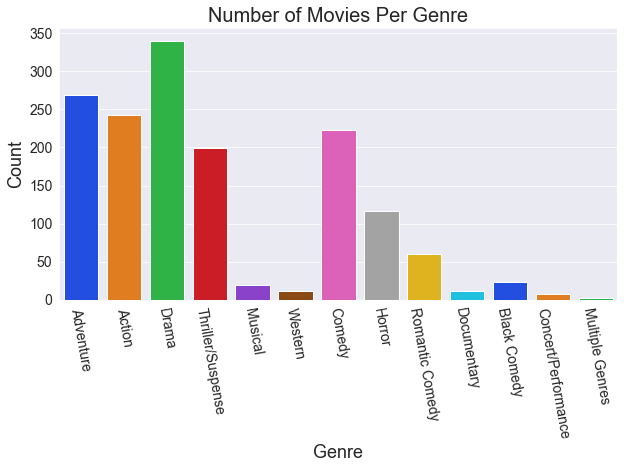

In [2066]:
# plotting the number of movies per genre in dataset
plt.figure(figsize=(10,5))
sns.countplot(x='genre', data=merged_df, palette='bright')
plt.title('Number of Movies Per Genre', fontsize=20)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=-80);

The Drama genre was most common in this dataset, followed by Adventure and Action. 

In [1602]:
# getting mean and median world gross amounts by genre
genre_stats = merged_df.groupby('genre')['world_gross_mil'].agg(['median', 'mean'])
genre_stats.sort_values(by='mean', ascending=False)

median   mean
genre                             
Musical              392.88 403.15
Adventure            232.02 346.05
Action               181.98 332.05
Western               75.52 124.18
Thriller/Suspense     60.28 114.38
Horror                82.12 106.19
Black Comedy          61.79  97.35
Comedy                70.55  93.15
Romantic Comedy       61.54  90.69
Drama                 43.33  84.17
Concert/Performance   27.96  33.47
Documentary           10.41  23.65
Multiple Genres        1.72   1.72

In [1592]:
# getting Q1 (25th percentile) for world gross of each genre
a = merged_df.groupby('genre')['world_gross_mil'].quantile(0.25)

In [1593]:
# getting Q3 (75th percentile) for world gross of each genre
b = merged_df.groupby('genre')['world_gross_mil'].quantile(0.75)

In [1594]:
# getting interquartile range (IQR) for world gross of each genre
iqr = b - a
iqr

genre
Action                372.28
Adventure             390.73
Black Comedy           54.42
Comedy                 97.13
Concert/Performance    34.49
Documentary            34.69
Drama                  85.06
Horror                 96.44
Multiple Genres         1.58
Musical               445.63
Romantic Comedy        92.37
Thriller/Suspense     104.42
Western               175.06
Name: world_gross_mil, dtype: float64

For my visualizations, I found it helpful to show my plots both with and without outliers. While outliers paint the whole picture of the data being analyzed, it can be helpful to see the data more closesly and "zoom in" (both literally and figuratively) on the trends without outliers. 

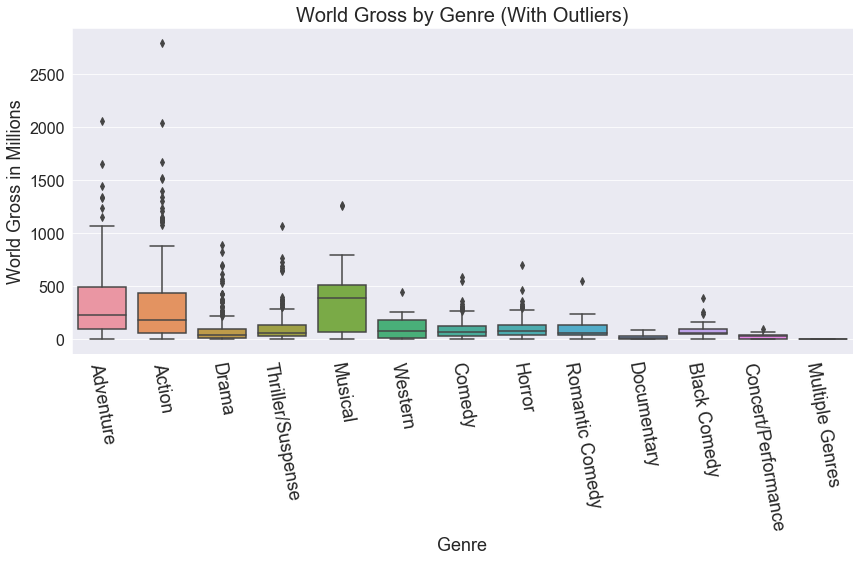

In [1973]:
# generating box plot of world gross statistics per genre
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.boxplot(x='genre', y='world_gross_mil', data=merged_df)
plt.xticks(rotation=-80)
plt.ylabel('World Gross in Millions', fontsize=18)
plt.xlabel('Genre', fontsize = 18)
plt.title('World Gross by Genre (With Outliers)', fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=16);

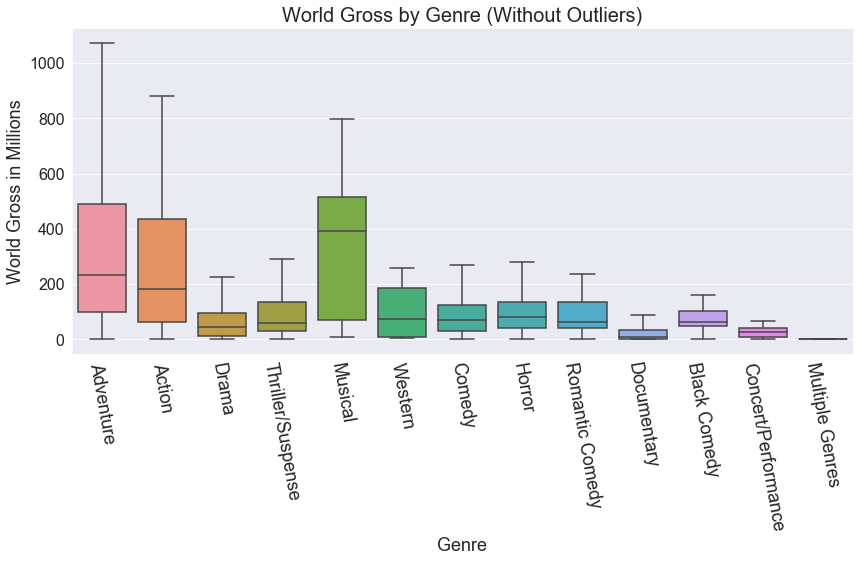

In [1975]:
# generating box plot of world gross statistics per genre
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.boxplot(x='genre', y='world_gross_mil', data=merged_df, showfliers=False)
plt.xticks(rotation=-80)
plt.ylabel('World Gross in Millions', fontsize=18)
plt.xlabel('Genre', fontsize = 18)
plt.title('World Gross by Genre (Without Outliers)', fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=16);

Based on mean and median, Musicals appeared to be the most lucrative genre for the time period I had explored. However, as can be seen from the box plot above, this was also the genre with the largest interquartile range (IQR), meaning that the middle values of world gross for these movies were the most spread out. After Musicals, Action and Adventure were the highest-grossing categories, with both high means and medians. These categories did have high IQR's as well, with a large variance in world gross values. Both Action and Adventure also had many high-grossing outliers, as can be seen in the first box plot above.

In [1705]:
# creating a copy of merged_df sorted in order of release date
time_df = merged_df.sort_values(by='release_date')

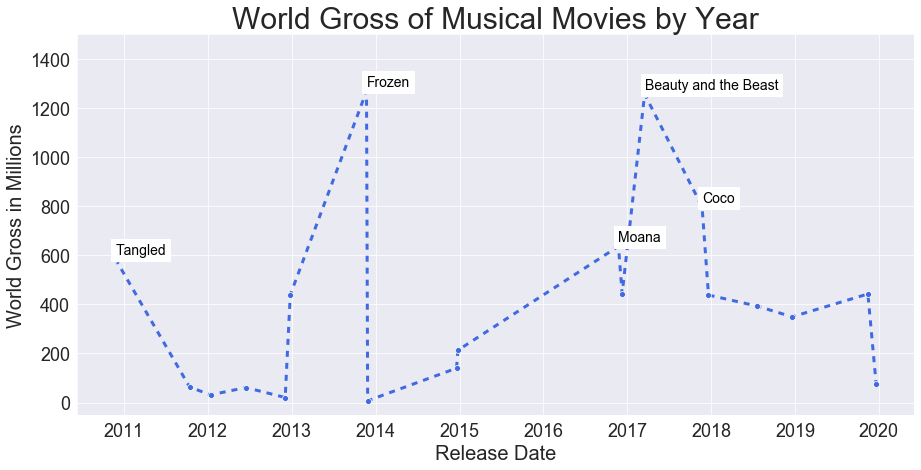

In [1977]:
# plotting the relationship between musical movies, world gross, and release month
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
sns.lineplot(data=time_df.loc[time_df['genre']=='Musical'], x="release_date", y="world_gross_mil", markers='o', style=True, dashes=[(2,2)], linewidth=3, color='royalblue', legend=False)
plt.title('World Gross of Musical Movies by Year', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Release Date', fontsize=20)
plt.ylabel('World Gross in Millions', fontsize=20)
plt.ylim(-50, 1500)
for w, x, y, z in zip(time_df['genre'], time_df['release_date'], time_df['world_gross_mil'], time_df['title']):
    if (w == 'Musical') & (y>500):
        plt.text(x = x, y = y+20, s = z, fontsize=14, color='black').set_backgroundcolor('white');

For musical movies in the past ten years, there were five titles that were much more successful than any others. There was also an obvious dip in the year 2020, thanks to the global COVID-19 pandemic.

In [1598]:
# creating subset of DataFrame where genre is Musical
musicals = merged_df.loc[merged_df['genre']=='Musical']
musicals.sort_values(by='world_gross_mil', ascending=False).head()

release_date  release_year                 title    genre  \
302   2013-11-22          2013                Frozen  Musical   
701   2017-03-17          2017  Beauty and the Beast  Musical   
712   2017-11-22          2017                  Coco  Musical   
610   2016-11-23          2016                 Moana  Musical   
9     2010-11-24          2010               Tangled  Musical   

               prod_method creative_type     budget  dom_gross  int_gross  \
302      Digital Animation  Kids Fiction  150000000  400738009  867336243   
701  Animation/Live Action       Fantasy  160000000  504014165  752128924   
712      Digital Animation  Kids Fiction  175000000  209936015  587870055   
610      Digital Animation  Kids Fiction  150000000  248757044  387587749   
9        Digital Animation  Kids Fiction  260000000  200821936  384905155   

      world_gross release_month  budget_in_mil  world_gross_mil  
302 1268074252.00      November         150.00          1268.07  
701 1256143089.00         March         160.00          1256.14  
712  797806070.00      November         175.00           797.81  
610  636344793.00      November         150.00           636.34  
9    585727091.00      November         260.00           585.73

I wanted to see which other attributes the most profitable movies in the Musical genre had shared. What I found was that, for the top five highest-grossing Musical movies in this time period, 4 out of 5 also happened to be: Digitally Animated, Kids Fiction, and released in November!  
Based on my analysis of genre, my recommendation to Microsoft was to consider making a musical movie.

#### Creative Type

In [1651]:
# getting value counts for creative type column
merged_df['creative_type'].value_counts()

Contemporary Fiction       694
Dramatization              164
Science Fiction            160
Kids Fiction               154
Historical Fiction         141
Fantasy                    136
Super Hero                  53
Factual                     18
Multiple Creative Types      5
Name: creative_type, dtype: int64

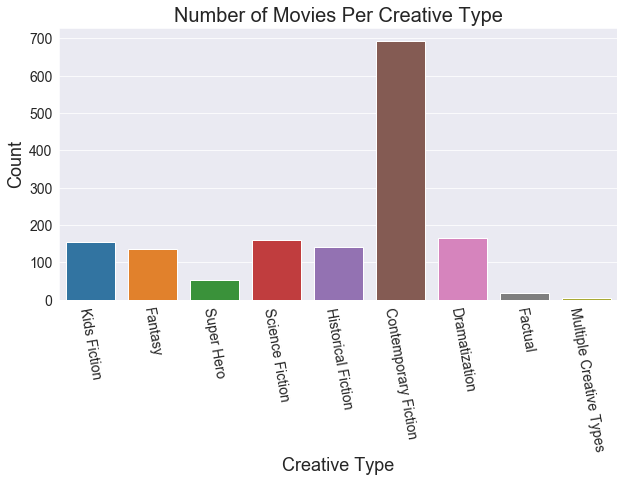

In [2068]:
# plotting the number of movies per creative type in dataset
plt.figure(figsize=(10,5))
sns.countplot(x='creative_type', data=merged_df)
plt.title('Number of Movies Per Creative Type', fontsize=20)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Creative Type', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=-80);

Contemporary Fiction was the most common creative type in this dataset by far.

In [1653]:
# getting mean and median world gross amounts by creative type
genre_stats = merged_df.groupby('creative_type')['world_gross_mil'].agg(['median', 'mean'])
genre_stats.sort_values(by='mean', ascending=False)

median   mean
creative_type                         
Super Hero               668.00 714.10
Kids Fiction             197.54 310.38
Fantasy                  156.96 288.10
Science Fiction          171.24 279.40
Contemporary Fiction      62.58 108.97
Historical Fiction        42.84  99.56
Dramatization             53.55  93.46
Factual                   32.51  47.64
Multiple Creative Types   31.16  45.12

Super Hero movies did substantially better at the box office than all other creative types, with Kids Fiction coming in second place.

In [1654]:
# getting Q1 (25th percentile) for world gross of each genre
a = merged_df.groupby('creative_type')['world_gross_mil'].quantile(0.25)

In [1655]:
# getting Q3 (75th percentile) for world gross of each genre
b = merged_df.groupby('creative_type')['world_gross_mil'].quantile(0.75)

In [1656]:
# getting interquartile range (IQR) for world gross of each genre
iqr = b - a
iqr

creative_type
Contemporary Fiction      104.98
Dramatization              99.43
Factual                    59.05
Fantasy                   279.93
Historical Fiction        122.94
Kids Fiction              344.91
Multiple Creative Types    56.62
Science Fiction           329.81
Super Hero                498.54
Name: world_gross_mil, dtype: float64

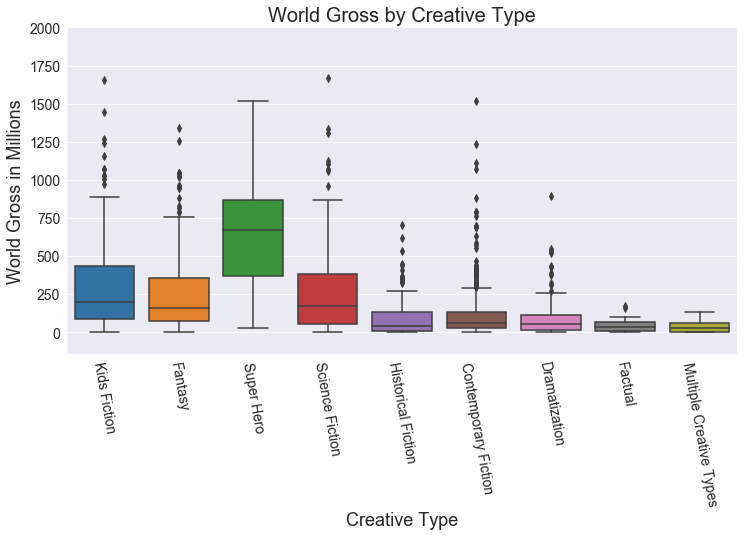

In [2070]:
# generating box plot of world gross statistics per creative type
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.boxplot(x='creative_type', y='world_gross_mil', data=merged_df)
plt.xticks(rotation=-80)
plt.ylabel('World Gross in Millions', fontsize=18)
plt.xlabel('Creative Type', fontsize = 18)
plt.title('World Gross by Creative Type', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(None, 2000);

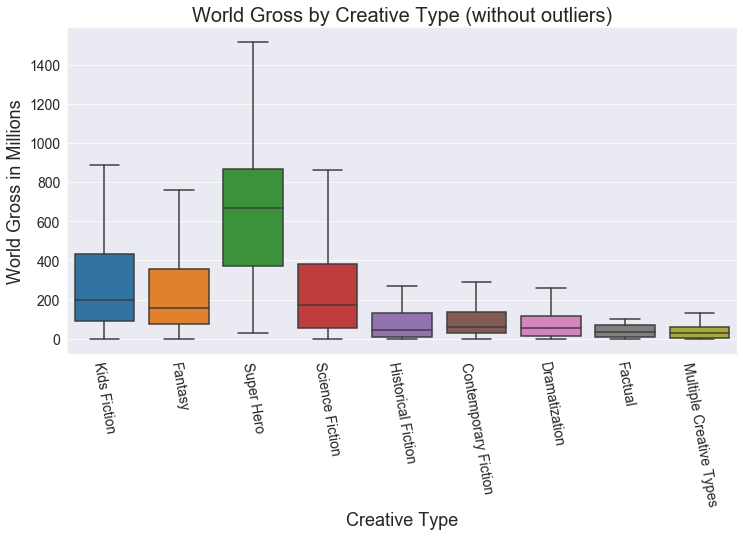

In [2072]:
# generating box plot of world gross statistics per creative type
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.boxplot(x='creative_type', y='world_gross_mil', data=merged_df, showfliers=False)
plt.xticks(rotation=-80)
plt.ylabel('World Gross in Millions', fontsize=18)
plt.xlabel('Creative Type', fontsize = 18)
plt.title('World Gross by Creative Type (without outliers)', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Based on mean and median, Super Hero movies were far above all the other creative types. Kids Fiction was in second place, with many high-grossing outliers (mentioned previously). Science Fiction and Fantasy had relatively high means and medians as well, and both creative types also contained many high-grossing outliers. 

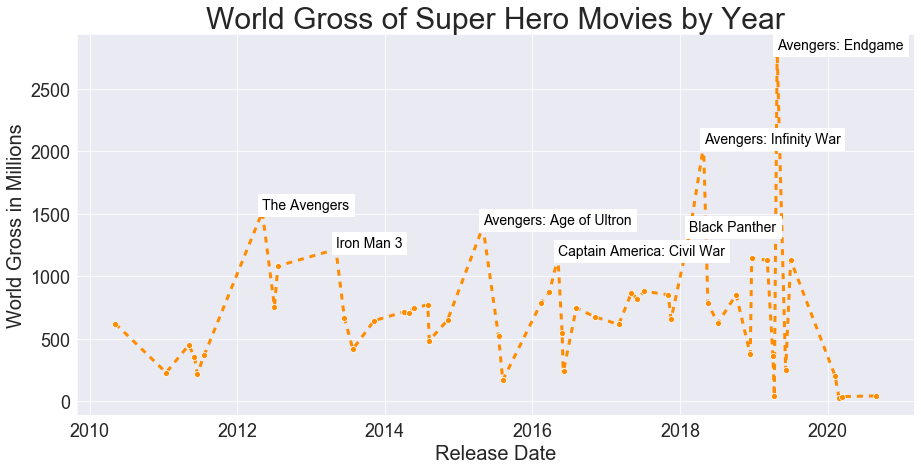

In [1985]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
sns.lineplot(data=time_df.loc[time_df['creative_type']=='Super Hero'], x="release_date", y="world_gross_mil", markers='o', style=True, dashes=[(2,2)], linewidth=3, color='darkorange', legend=False)
plt.title('World Gross of Super Hero Movies by Year', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Release Date', fontsize=20)
plt.ylabel('World Gross in Millions', fontsize=20)
for w, x, y, z in zip(time_df['creative_type'], time_df['release_date'], time_df['world_gross_mil'], time_df['title']):
    if (w == 'Super Hero') & (y>1150):
        plt.text(x = x, y = y+20, s = z, fontsize=14, color='black').set_backgroundcolor('white');
        

Super Hero movies seemed to do consistently well over the past ten years, although the line plot showed some ups and downs. Still, even the lows for Super Hero movies would be considered highs for other types of movies, so perspective is important. The plot showed seven titles that did extremely well for their movie type.

In [1659]:
# creating subset of DataFrame where creative type is Super Hero
superhero = merged_df.loc[merged_df['creative_type']=='Super Hero']
superhero.sort_values(by='world_gross_mil', ascending=False).head()

release_date  release_year                    title   genre  \
900   2019-04-26          2019        Avengers: Endgame  Action   
801   2018-04-27          2018   Avengers: Infinity War  Action   
200   2012-05-04          2012             The Avengers  Action   
502   2015-05-01          2015  Avengers: Age of Ultron  Action   
800   2018-02-16          2018            Black Panther  Action   

               prod_method creative_type     budget  dom_gross   int_gross  \
900  Animation/Live Action    Super Hero  400000000  858373000  1939427564   
801  Animation/Live Action    Super Hero  300000000  678815482  1365725041   
200  Animation/Live Action    Super Hero  225000000  623357910   891742301   
502  Animation/Live Action    Super Hero  365000000  459005868   937093334   
800            Live Action    Super Hero  200000000  700059566   639674336   

      world_gross release_month  budget_in_mil  world_gross_mil  
900 2797800564.00         April         400.00          2797.80  
801 2044540523.00         April         300.00          2044.54  
200 1515100211.00           May         225.00          1515.10  
502 1396099202.00           May         365.00          1396.10  
800 1339733902.00      February         200.00          1339.73

As I had anticipated, The Avengers movies dominated the Super Hero category. All of these movies were produced by Live Action in the Action genre, and they were all released in either April or May. Based on my analysis of creative type, my recommendation to Microsoft was to explore the idea of making a Super Hero movie. 

#### Production Method

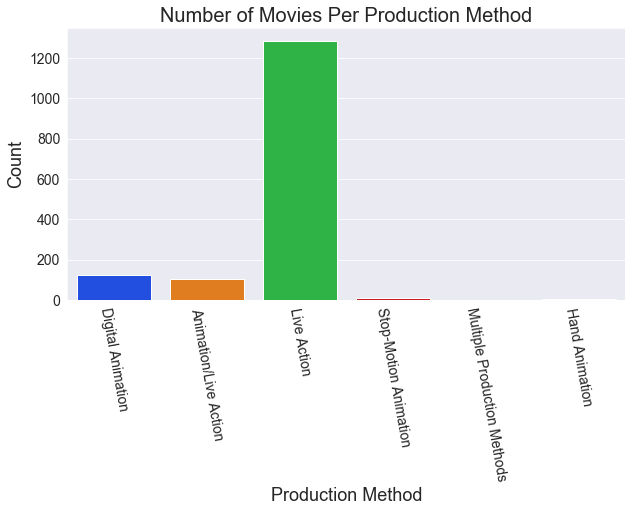

In [2064]:
# plotting the number of movies per production method in dataset
plt.figure(figsize=(10,5))
sns.countplot(x='prod_method', data=merged_df, palette='bright')
plt.title('Number of Movies Per Production Method', fontsize=20)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Production Method', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=-80);

Live Action was the most common production method by far.

In [1718]:
# getting mean and median world gross amounts by production method
prod_stats = merged_df.groupby('prod_method')['world_gross_mil'].agg(['median', 'mean'])
prod_stats.sort_values(by='mean', ascending=False)

median   mean
prod_method                               
Animation/Live Action        393.15 577.83
Digital Animation            247.91 345.28
Live Action                   68.24 134.19
Stop-Motion Animation         91.54  90.09
Hand Animation                29.76  54.91
Multiple Production Methods   17.23  17.23

However, the Animation/Live Action category had the highest mean and median, with Digital Animation coming in second.

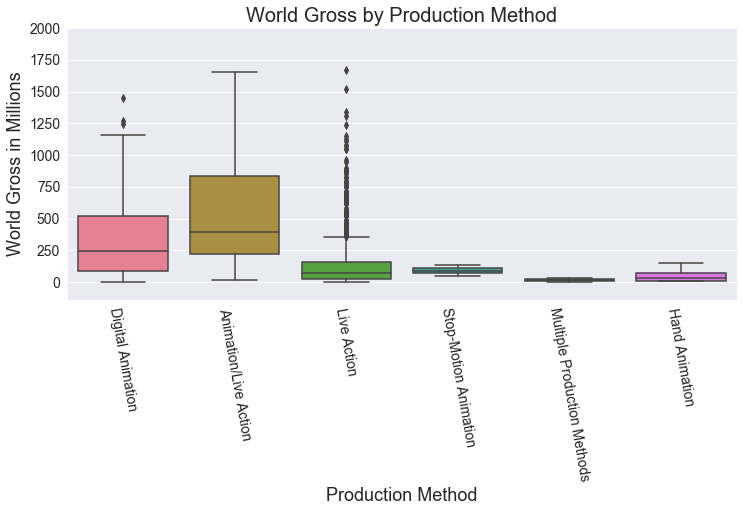

In [2062]:
# generating box plot of world gross statistics per production method
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.boxplot(x='prod_method', y='world_gross_mil', data=merged_df, palette='husl')
plt.xticks(rotation=-80)
plt.ylabel('World Gross in Millions', fontsize=18)
plt.xlabel('Production Method', fontsize = 18)
plt.title('World Gross by Production Method', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(None, 2000);

Based on mean and median, Animation/Live Action and Digital Animation appeared to be the most successful production methods for the time period I had explored.

In [1737]:
# creating subset of DataFrame where prod_method is Animation/Live Action or Digital Animation
anim_df = merged_df.loc[(merged_df['prod_method']=='Animation/Live Action') | (merged_df['prod_method']=='Digital Animation')]
anim_df.sort_values(by='world_gross_mil', ascending=False).head(10)

release_date  release_year  \
900    2019-04-26          2019   
500    2015-12-18          2015   
801    2018-04-27          2018   
901    2019-07-19          2019   
200    2012-05-04          2012   
903    2019-11-22          2019   
502    2015-05-01          2015   
1964   2011-07-07          2011   
700    2017-12-15          2017   
302    2013-11-22          2013   

                                              title      genre  \
900                               Avengers: Endgame     Action   
500            Star Wars Ep. VII: The Force Awakens  Adventure   
801                          Avengers: Infinity War     Action   
901                                   The Lion King  Adventure   
200                                    The Avengers     Action   
903                                       Frozen II  Adventure   
502                         Avengers: Age of Ultron     Action   
1964  Harry Potter and the Deathly Hallows: Part II  Adventure   
700               Star Wars Ep. VIII: The Last Jedi  Adventure   
302                                          Frozen    Musical   

                prod_method    creative_type     budget  dom_gross  \
900   Animation/Live Action       Super Hero  400000000  858373000   
500   Animation/Live Action  Science Fiction  306000000  936662225   
801   Animation/Live Action       Super Hero  300000000  678815482   
901   Animation/Live Action     Kids Fiction  260000000  543638043   
200   Animation/Live Action       Super Hero  225000000  623357910   
903       Digital Animation     Kids Fiction  150000000  477373578   
502   Animation/Live Action       Super Hero  365000000  459005868   
1964  Animation/Live Action          Fantasy  125000000  381193157   
700   Animation/Live Action  Science Fiction  200000000  620181382   
302       Digital Animation     Kids Fiction  150000000  400738009   

       int_gross   world_gross release_month  budget_in_mil  world_gross_mil  
900   1939427564 2797800564.00         April         400.00          2797.80  
500   1128815859 2065478084.00      December         306.00          2065.48  
801   1365725041 2044540523.00         April         300.00          2044.54  
901   1112503536 1656141579.00          July         260.00          1656.14  
200    891742301 1515100211.00           May         225.00          1515.10  
903    969892165 1447265743.00      November         150.00          1447.27  
502    937093334 1396099202.00           May         365.00          1396.10  
1964   960500000 1341693157.00          July         125.00          1341.69  
700    712358507 1332539889.00      December         200.00          1332.54  
302    867336243 1268074252.00      November         150.00          1268.07

I immediately noticed some overlap between this subset and the Musical and Super Hero subsets. Many of the top titles for this animation subset were either musicals or super hero movies as well. I also noted that while Frozen II seemed just as musical as the original Frozen, the dataset had it listed as an adventure movie. I wondered if there may be other children's animated movies in the data that were musical as well but labeled with a different genre. Based on my analysis of production methods, my recommendation to Microsoft was that they should utilize animation, whether solely digital animation or in conjunction with live action, in order to achieve the highest possible movie gross. 

### Release Month: When is the most lucrative time of year to release a movie?

In [1624]:
merged_df['release_month'].value_counts()

September    160
August       142
December     142
February     141
October      139
November     134
July         125
March        123
January      119
June         105
May          102
April         93
Name: release_month, dtype: int64

While the release dates were fairly evenly distributed throughout the year, most of the movies in this dataset were released in September and August. December, February, November, Ocotober, March, July, and January were all very close behind. 

In [1634]:
# getting mean and median world gross amounts by release month
months_df = merged_df['world_gross_mil'].groupby(merged_df['release_month']).agg(['median', 'mean'])
months_df.sort_values(by='mean', ascending=False)

median   mean
release_month               
May            150.95 299.22
June           205.44 295.82
July           146.60 275.08
November       138.91 252.66
December       125.04 234.96
April           70.69 197.72
March           87.15 172.53
February        55.35 115.39
October         65.25 114.81
August          71.95 107.91
January         61.64  92.55
September       44.64  89.02

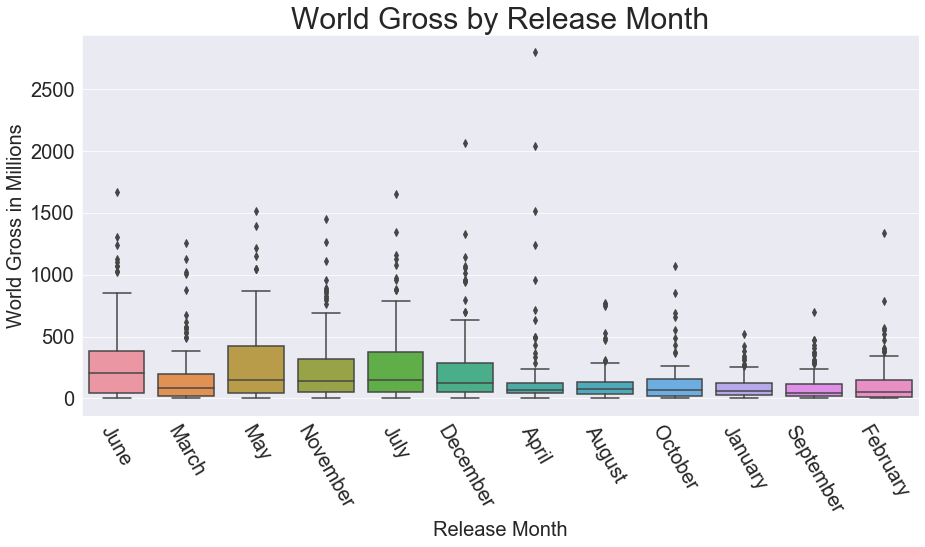

In [1992]:
plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.boxplot(x='release_month', y='world_gross_mil', data=merged_df)
plt.xticks(rotation=-60)
plt.ylabel('World Gross in Millions', fontsize=20)
plt.xlabel('Release Month', fontsize = 20)
plt.title('World Gross by Release Month', fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

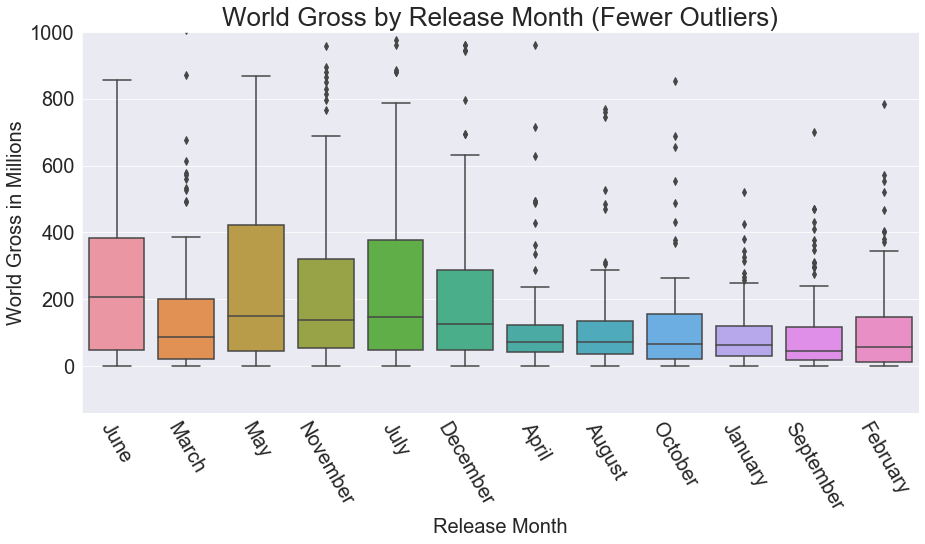

In [1994]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.boxplot(x='release_month', y='world_gross_mil', data=merged_df)
plt.xticks(rotation=-60)
plt.ylabel('World Gross in Millions', fontsize=20)
plt.xlabel('Release Month', fontsize = 20)
plt.title('World Gross by Release Month (Fewer Outliers)', fontsize = 26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(None, 1000);

Based on release month alone, May, June, and July seemed to be the most profitable months with the highest mean value for world box office gross. My recommendation to Microsoft was to release a movie in one of the months with a higher mean world gross. But I wondered, how much does the type of movie impact the time of year that a movie does best?

### Production Budget: What budget amount tends to achieve the highest box office gross?

The first thing I did was run the .corr method on a subset of merged_df that contained only dollar amount data. I then generated a heatmap based on these correlations.

In [1675]:
# creating subset with only dollar amount data
money_df = merged_df.drop(['release_date', 'release_year', 'title', 'genre', 'prod_method', 'creative_type', 'release_month', 'world_gross_mil', 'budget_in_mil'], axis=1)
# generating correlations
corr = money_df.corr()
corr

budget  dom_gross  int_gross  world_gross
budget         1.00       0.69       0.78         0.78
dom_gross      0.69       1.00       0.87         0.94
int_gross      0.78       0.87       1.00         0.98
world_gross    0.78       0.94       0.98         1.00

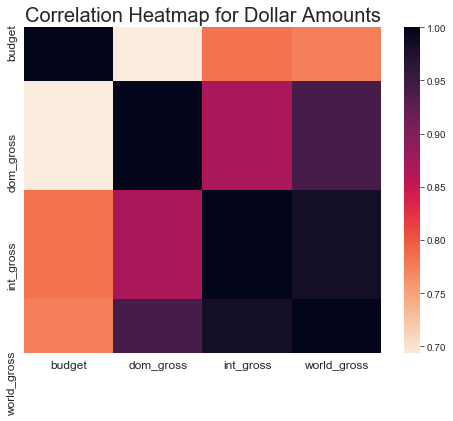

In [1996]:
# plotting heatmap of correlations
plt.figure(figsize=(8,6))
plt.title("Correlation Heatmap for Dollar Amounts", fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sns.heatmap(corr, cmap='rocket_r');

The heatmap shows darker colors where two values are correlated and lighter colors where there is less of a correlation. It was clear from the heatmap that there was a strong correlation between budget and world gross. There were also strong correlations between buddget and domestic gross, as well as budget and international gross. In other words, the more money you put into a movie, the more money you are likely to make from it.

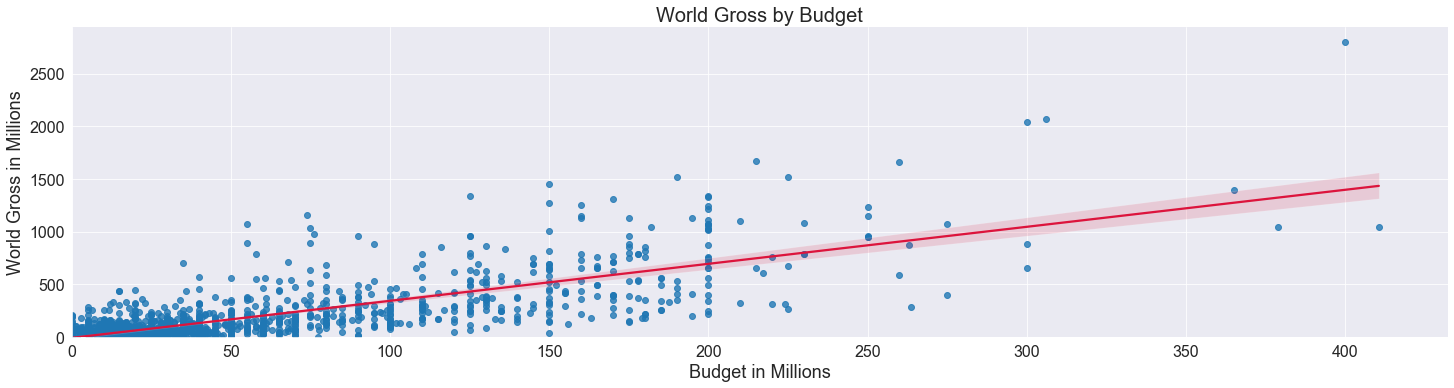

In [2049]:
# plotting world gross by budget in terms of genre with line of best fit
sns.lmplot(x='budget_in_mil', y='world_gross_mil', data=merged_df, aspect=4, line_kws={'color': 'crimson'})
plt.title('World Gross by Budget', fontsize=20)
plt.xlabel('Budget in Millions', fontsize=18)
plt.ylabel('World Gross in Millions', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,None)
plt.xlim(0, None);

The regression line in this plot shows the general increase in movie gross as the budget increases. While this varies greatly from movie to movie, it was a good starting point as I worked towards combining my findings and forming my recommendations. This plot confirmed my statement that a higher production budget typically leads to a higher box office gross. The optimal amount for budget is between 300 and 400 million dollars. Based on my analysis, my recommendation to Microsoft was to allocate as much funding towards production budget as possible to achieve the highest possible box office gross. 

### Putting It All Together!

Now that I had my general answers to each of the primary business questions that were laid out at the onset of this project, it was time to combine them into an actionable plan for Microsoft's up-and-coming movie studio. 

Based on my initial analyses above, I had narrowed down my movie type recommendation to either animated musical movies for children or super hero movies utilizing animation and live action. These were the highest-scoring categories in their respective groupings (genre, creative type, and production method) when it came to mean world gross. Since I had discovered that many animated musical movies were not classified as musicals but simply as having an animated production method, I broadened my category to include all animated titles, knowing that the musical ones would be the ones to achieve the highest gross (as seen above).  

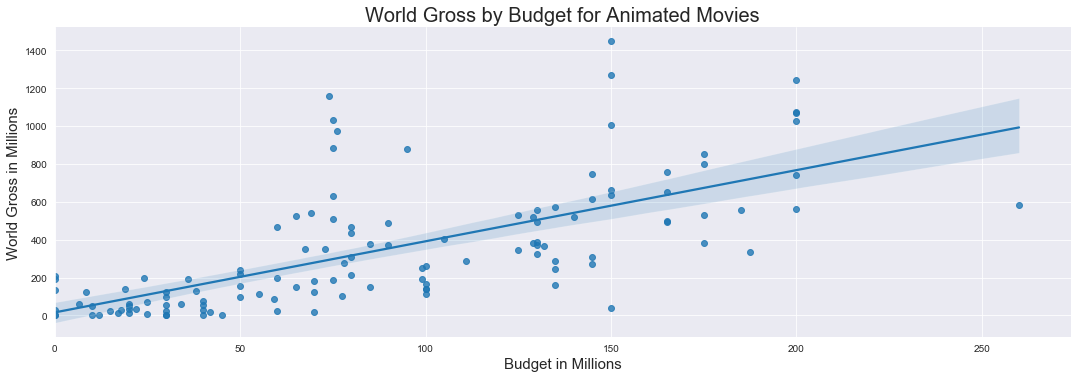

In [2047]:
# plotting world gross by budget for animated movies
sns.set_style('darkgrid')
sns.lmplot(x='budget_in_mil', y='world_gross_mil', data=merged_df.loc[merged_df['prod_method']=='Digital Animation'], aspect=3)
plt.title('World Gross by Budget for Animated Movies', fontsize=20)
plt.xlabel('Budget in Millions', fontsize=15)
plt.ylabel('World Gross in Millions', fontsize=15)
plt.xlim(0, None);

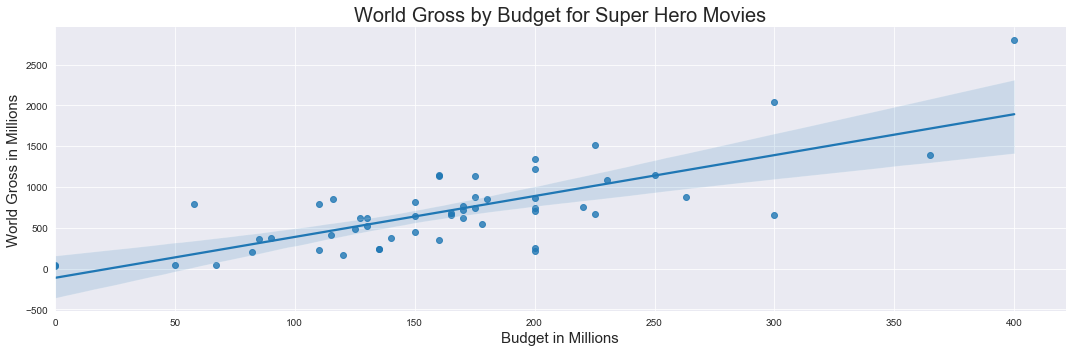

In [2045]:
# plotting world gross by budget for super hero movies
sns.set_style('darkgrid')
sns.lmplot(x='budget_in_mil', y='world_gross_mil', data=merged_df.loc[merged_df['creative_type']=='Super Hero'], aspect=3)
plt.title('World Gross by Budget for Super Hero Movies', fontsize=20)
plt.xlabel('Budget in Millions', fontsize=15)
plt.ylabel('World Gross in Millions', fontsize=15)
plt.xlim(0, None);

For both animated movies and super hero movies, the world gross values increased as the production budget increased. The regression line for each plot shows that both movie types benefit from a large production budget.

In [1751]:
# creating column to signify whether a title is animated or superhero
merged_df.loc[merged_df['prod_method']=='Digital Animation', 'animated_or_super']='animated'
merged_df.loc[merged_df['creative_type']=='Super Hero', 'animated_or_super']='super'

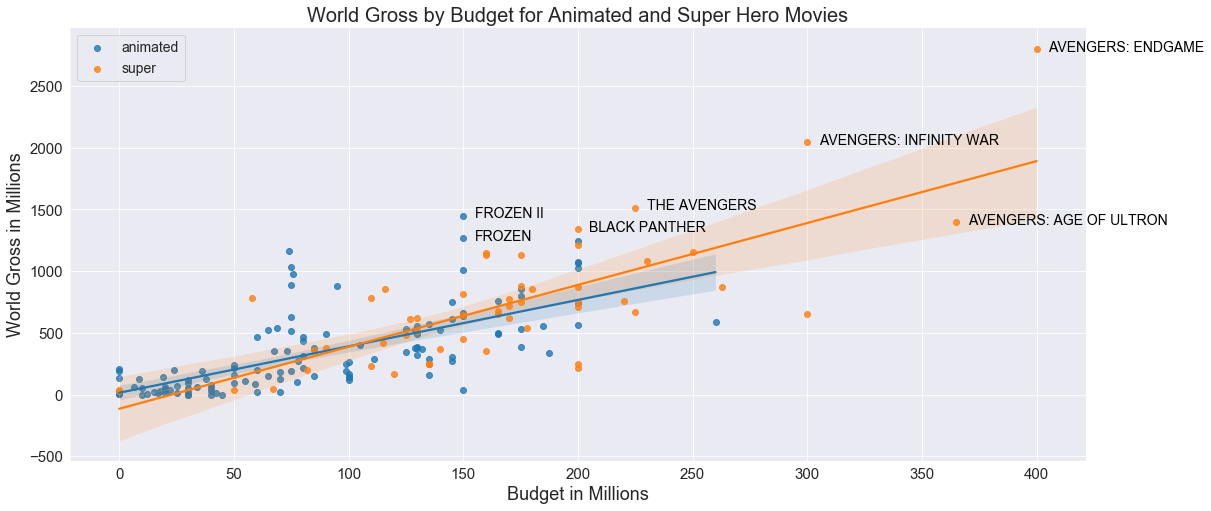

In [2042]:
# plotting world gross by budget for animated and super hero movies
sns.set_style('darkgrid')
g = sns.lmplot(x='budget_in_mil', y='world_gross_mil', data=merged_df.loc[(merged_df['prod_method']=='Digital Animation') | (merged_df['creative_type']=='Super Hero')], hue='animated_or_super', aspect=3, legend=False)
plt.title('World Gross by Budget for Animated and Super Hero Movies', fontsize=20)
plt.xlabel('Budget in Millions', fontsize=18)
plt.ylabel('World Gross in Millions', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
g.fig.set_size_inches(15,7)
plt.legend(loc='upper left', fontsize=14)
for w, x, y, z in zip(merged_df['animated_or_super'], merged_df['budget_in_mil'], merged_df['world_gross_mil'], merged_df['title']):
    if (w == 'animated') & (y>1250):
        plt.text(x = x+5, y = y-15, s = z.upper(), fontsize=14, color='black')
for w, x, y, z in zip(merged_df['animated_or_super'], merged_df['budget_in_mil'], merged_df['world_gross_mil'], merged_df['title']):
    if (w == 'super') & (y>1250):
        plt.text(x = x+5, y = y-15, s = z.upper(), fontsize=14, color='black');
        

This plot shows that while animated movies and super hero movies both have a positive correlation between production budget and world gross, super hero movies have the stronger correlation of the two. Most animated movies studied in this data had lower budgets than super hero movies and lower world gross as well. It is worth noting that the world gross value threshold I used for finding the top five super hero movies only includes two animated movies: Frozen and Frozen II. 

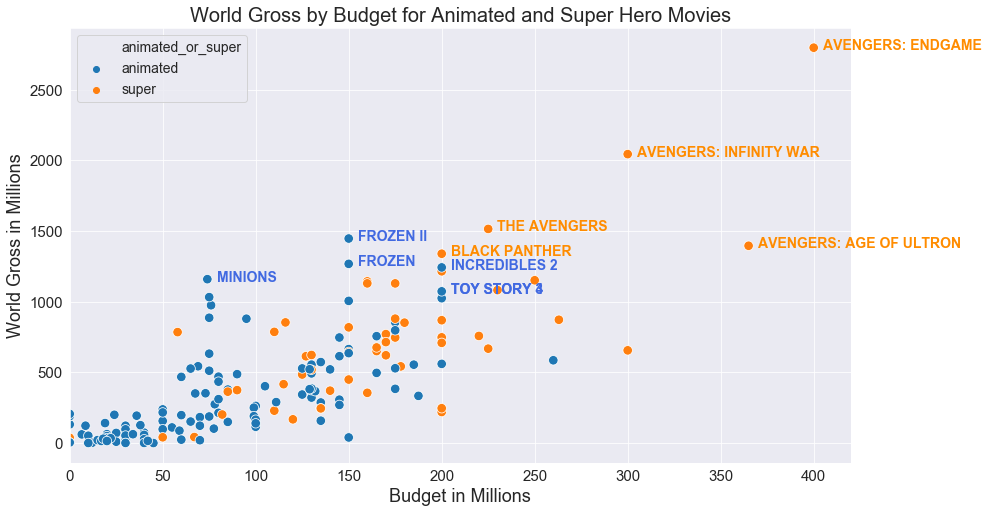

In [2044]:
# plotting world gross by budget for animated and super hero movies
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
p1 = sns.scatterplot(x='budget_in_mil', y='world_gross_mil', data=merged_df.loc[(merged_df['creative_type']=='Super Hero') | (merged_df['prod_method']=='Digital Animation')], hue='animated_or_super', s=90)
plt.title('World Gross by Budget for Animated and Super Hero Movies', fontsize=20)
plt.xlabel('Budget in Millions', fontsize=18)
plt.ylabel('World Gross in Millions', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, None)
plt.legend(loc='upper left', fontsize=14)
for w, x, y, z in zip(merged_df['animated_or_super'], merged_df['budget_in_mil'], merged_df['world_gross_mil'], merged_df['title']):
    if (w == 'animated') & (y>1040):
        plt.text(x = x+5, y = y-15, s = z.upper(), fontsize=14, color='royalblue', weight='bold')
for w, x, y, z in zip(merged_df['animated_or_super'], merged_df['budget_in_mil'], merged_df['world_gross_mil'], merged_df['title']):
    if (w == 'super') & (y>1250):
        plt.text(x = x+5, y = y-15, s = z.upper(), fontsize=14, color='darkorange', weight='bold')
        

For a closer look, this plot shows the relationship between production budget and world gross for the top five movies of each type. There is a tendency for super hero movies to have both higher budgets and higher world gross values. While the super hero movies are found more towards the upper right of the graph (indicating higher budget and higher gross), the animated movies are concentrated towards the lower bottom (indiciating lower budget and lower gross).

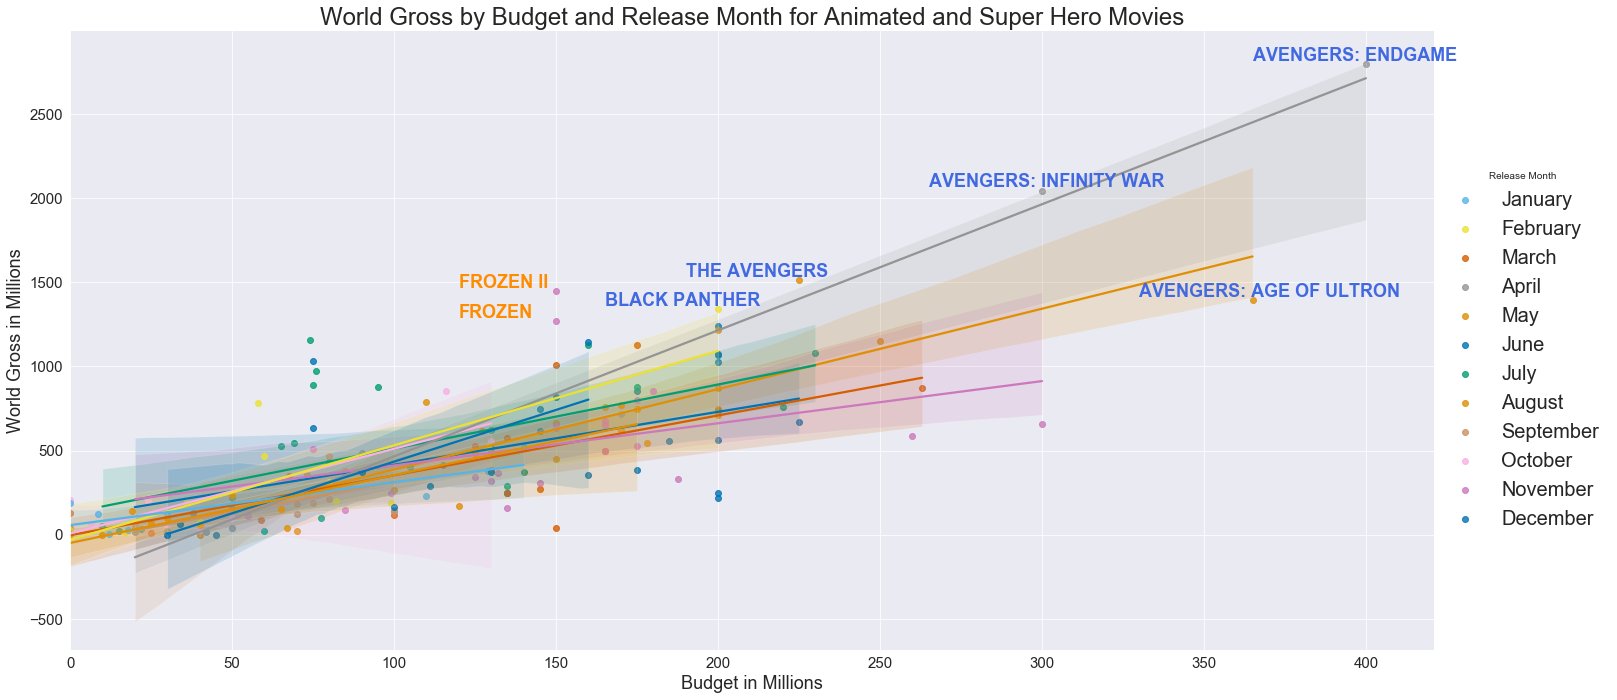

In [2025]:
sns.set_style('darkgrid')
g = sns.lmplot(x='budget_in_mil', y='world_gross_mil', data=merged_df.loc[(merged_df['prod_method']=='Digital Animation') | (merged_df['creative_type']=='Super Hero')], hue='release_month', aspect=4, legend=False, palette='colorblind')
plt.title('World Gross by Budget and Release Month for Animated and Super Hero Movies', fontsize=24)
plt.xlabel('Budget in Millions', fontsize=18)
plt.ylabel('World Gross in Millions', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, None)
g.fig.set_size_inches(20,10)
g.add_legend(title='Release Month', label_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], fontsize=20)
for w, x, y, z in zip(merged_df['animated_or_super'], merged_df['budget_in_mil'], merged_df['world_gross_mil'], merged_df['title']):
    if (w == 'animated') & (y>1250):
        plt.text(x = x-30, y = y+20, s = z.upper(), fontsize=18, color='darkorange', weight='bold')
for w, x, y, z in zip(merged_df['animated_or_super'], merged_df['budget_in_mil'], merged_df['world_gross_mil'], merged_df['title']):
    if (w == 'super') & (y>1250):
        plt.text(x = x-35, y = y+20, s = z.upper(), fontsize=18, color='royalblue', weight='bold')

Looking at animated and super hero movies together, when color-coded by release month, the regression lines show that April is the most successful time to release a high-budget film.

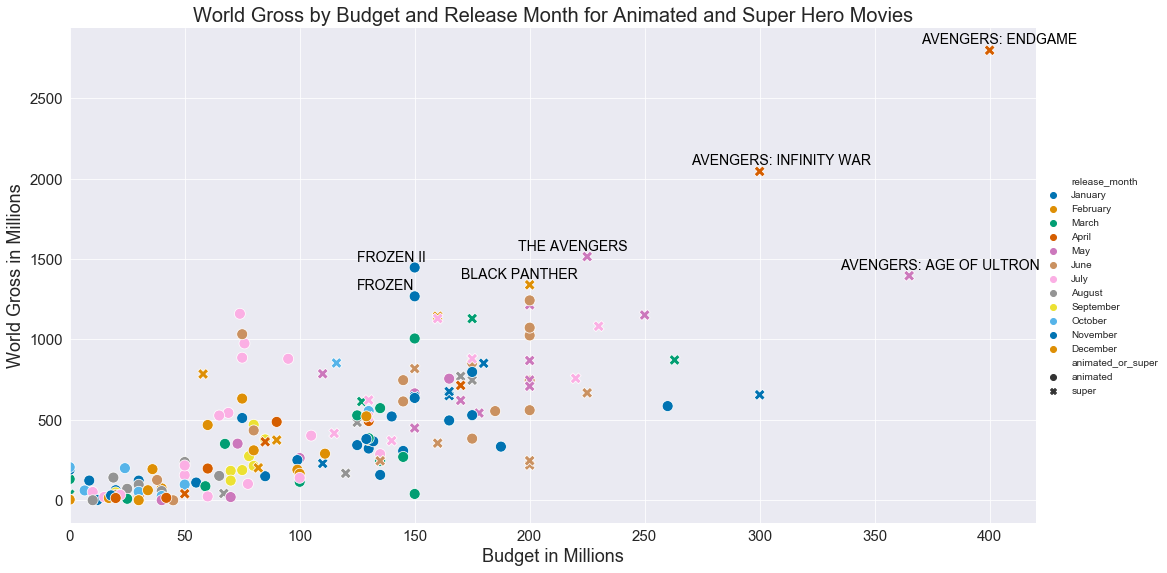

In [2074]:
# plotting world gross by budget and release month for animated and super hero movies
sns.set_style('darkgrid')
g = sns.relplot(x='budget_in_mil', y='world_gross_mil', data=merged_df.loc[(merged_df['prod_method']=='Digital Animation') | (merged_df['creative_type']=='Super Hero')], hue='release_month', hue_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], style='animated_or_super', s=120, aspect=3, palette='colorblind')
plt.title('World Gross by Budget and Release Month for Animated and Super Hero Movies', fontsize=20)
plt.xlabel('Budget in Millions', fontsize=18)
plt.ylabel('World Gross in Millions', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, None)
g.fig.set_size_inches(16,8)
for w, x, y, z in zip(merged_df['animated_or_super'], merged_df['budget_in_mil'], merged_df['world_gross_mil'], merged_df['title']):
    if (w == 'animated') & (y>1250):
        plt.text(x = x-25, y = y+40, s = z.upper(), fontsize=14, color='black')
for w, x, y, z in zip(merged_df['animated_or_super'], merged_df['budget_in_mil'], merged_df['world_gross_mil'], merged_df['title']):
    if (w == 'super') & (y>1250):
        plt.text(x = x-30, y = y+40, s = z.upper(), fontsize=14, color='black');

This visualization shows the relationship between all the key factors that I analyzed: movie type, release month, and budget. Based on the top movies that meet these criteria, super hero movies do best when given a very high budget and are released in April or May. Animated musicals find the most success when released in November, and don't necessarily need quite as high of a budget to achieve the same gross.

### Additional Attributes: Based on these findings, what else do top-grossing movies have in common?

#### Directors
Now that we know that a high-budget super hero movie released in April or May is the most rewarding combination of factors, how can we make this movie even better and ensure that it reaches its full potential? One way that we can increase our chances of success is by hiring the right director for this type of movie.  

To further this point, I utilized the TMDb API to obtain the director names for all the super hero movies in my dataset.

In [2076]:
def get_director(title):
    """ 
    Updates director information for movie in dataframe.
  
    Queries TMDB for a given movie title.
    Retrieves TMDB movie_id for title.
    Retrieves director information based on movie_id.
    Adds director information to a list.
    Converts director information from list to string.
    Adds new director value as string to movie's row in dataframe. 
  
    Parameters: 
    title (str): user input movie title.
  
    Returns: 
    Updated cells in Pandas DataFrame. 
    
    """
    title_r = title.replace(' ', '+')
    url = f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={title_r}"
    response = requests.get(url)
    if len(response.json()['results']) > 0:
        movie_id = response.json()['results'][0]['id']
        url2 = f"https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={api_key}"
        response2 = requests.get(url2)
        crew = response2.json()['crew']
        directors = []
        for member in crew:
            if member['job'] == 'Director':
                directors.append(member['name'])
                d = str(directors)
                d = d.replace('[', '').replace(']', '').replace("'","")
                merged_df.loc[merged_df['title']==title, 'director'] = d
    else:
        pass

In [2077]:
# creating a list of all the super hero movie titles
superhero_titles = [title for title in superhero['title']]

In [2078]:
# getting director info for movies in list and updating data accordingly
for title in superhero_titles:
    get_director(title)

In [2079]:
# getting director value counts
merged_df.director.value_counts()

Anthony Russo, Joe Russo    4
Zack Snyder                 3
Marc Webb                   2
Dave Green                  2
James Mangold               2
Jon Watts                   2
James Gunn                  2
Peyton Reed                 2
Bryan Singer                2
Joss Whedon                 2
Christopher Nolan           1
Jonathan Liebesman          1
David Leitch                1
Kenneth Branagh             1
Laurent Bouzereau           1
Neil Marshall               1
Taika Waititi               1
Patty Jenkins               1
Tim Miller                  1
Simon Kinberg               1
Chris Williams, Don Hall    1
Joe Johnston                1
Ruben Fleischer             1
Shane Black                 1
Tim Story                   1
David Ayer                  1
Josh Boone                  1
David F. Sandberg           1
Martin Campbell             1
Scott Derrickson            1
James Wan                   1
Dave Wilson                 1
Ryan Coogler                1
Ryan Fleck

In [2080]:
# getting mean and median stats for directors
director_stats = merged_df.groupby('director')['world_gross_mil'].agg(['median', 'mean']).reset_index()
director_stats.sort_values(by='mean', ascending=False)

director  median    mean
1   Anthony Russo, Joe Russo 1598.23 1677.17
18               Joss Whedon 1455.60 1455.60
28              Ryan Coogler 1339.73 1339.73
31               Shane Black 1215.39 1215.39
12                 James Wan 1143.97 1143.97
29    Ryan Fleck, Anna Boden 1129.73 1129.73
4          Christopher Nolan 1082.23 1082.23
15                 Jon Watts 1005.06 1005.06
27           Ruben Fleischer  853.63  853.63
33             Taika Waititi  851.86  851.86
10                James Gunn  819.98  819.98
25             Patty Jenkins  818.79  818.79
9               David Leitch  786.68  786.68
34                Tim Miller  785.03  785.03
7                 David Ayer  746.85  746.85
21                 Marc Webb  733.44  733.44
36               Zack Snyder  668.00  732.11
30          Scott Derrickson  676.35  676.35
3   Chris Williams, Don Hall  650.71  650.71
2               Bryan Singer  645.20  645.20
0                Alan Taylor  644.60  644.60
14               Jon Favreau  621.16  621.16
26               Peyton Reed  571.00  571.00
11             James Mangold  515.33  515.33
16        Jonathan Liebesman  485.00  485.00
19           Kenneth Branagh  449.33  449.33
13              Joe Johnston  370.57  370.57
8          David F. Sandberg  363.66  363.66
20         Laurent Bouzereau  355.41  355.41
32             Simon Kinberg  246.36  246.36
5                 Dave Green  245.33  245.33
23             Michel Gondry  229.16  229.16
22           Martin Campbell  219.54  219.54
35                 Tim Story  167.85  167.85
17                Josh Boone   42.50   42.50
24             Neil Marshall   40.79   40.79
6                Dave Wilson   37.32   37.32

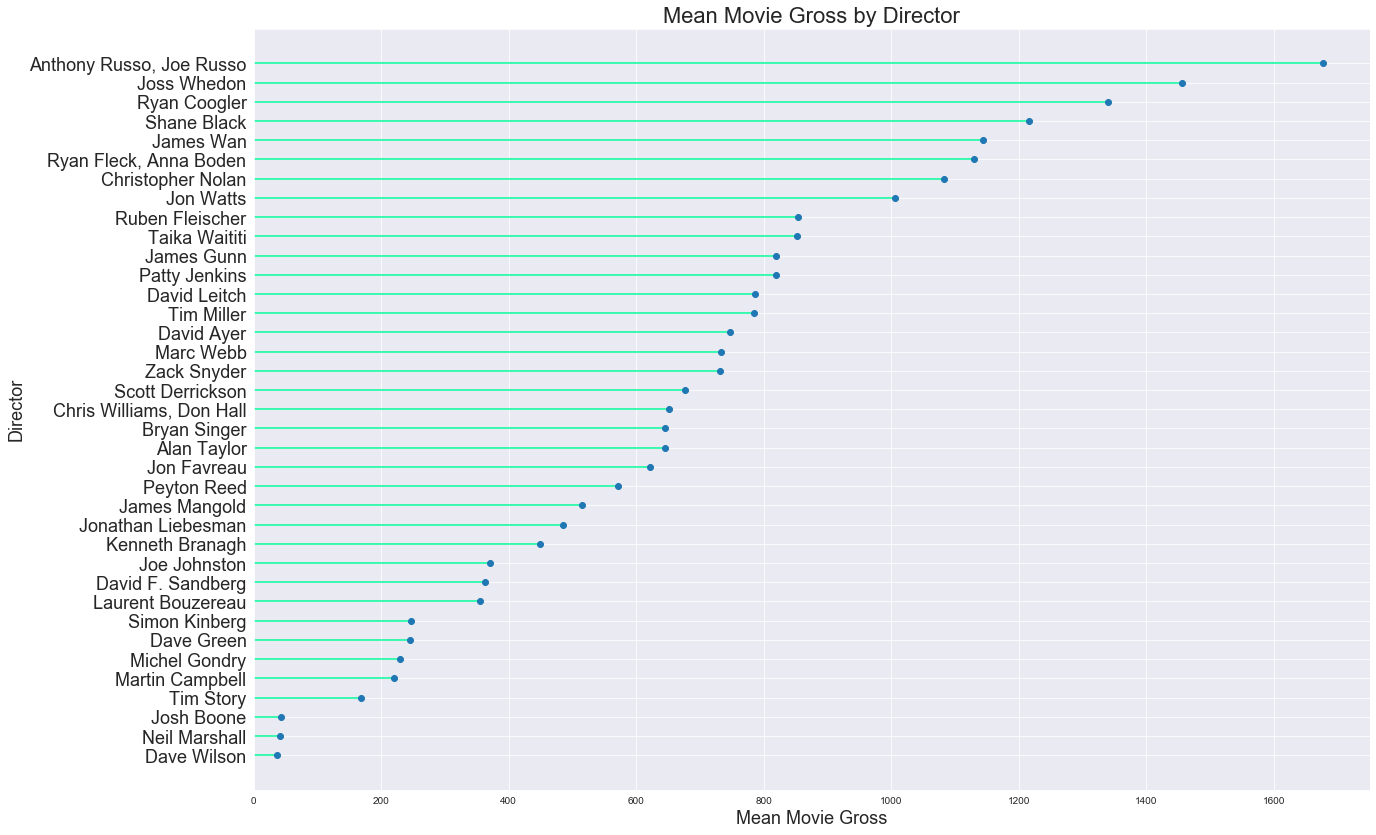

In [2081]:
# plotting directors in order of highest-grossing, descending
plt.figure(figsize=(20, 14))
ordered_df = director_stats.sort_values(by='mean')
my_range=range(1,len(director_stats.index)+1)
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['mean'], color='mediumspringgreen')
plt.plot(ordered_df['mean'], my_range, "o")
plt.yticks(my_range, ordered_df['director'], fontsize=18)
plt.title("Mean Movie Gross by Director", fontsize=22)
plt.xlabel('Mean Movie Gross', fontsize=18)
plt.ylabel('Director', fontsize=18)
plt.xlim(0, 1750);

As both the director_stats DataFrame and the Mean Movie Gross by Director plot show, for the past ten years, the top five directors (or combinations of directors) for super hero movies by mean world gross are:
1. Anthony Russo, Joe Russo
2. Joss Whedon
3. Ryan Coogler
4. Shane Black
5. James Wan  
  
Hiring one of these top directors to work on a super hero movie can further increase the chances of a successful movie venture. 

#### Composers
For the animated movie, I had found that the musical ones tended to have the highest box office gross. To that end, I again used the TMDb API, this time to obtain composer information for all the animated movies in my dataset. Because not every animated movie was a musical one, they did not all have composer information available. Only the titles that had an associated composer value available were used in the following analysis.

In [2082]:
def get_composer(title):
    """ 
    Updates composer information for movie in dataframe.
  
    Queries TMDB for a given movie title.
    Retrieves TMDB movie_id for title.
    Retrieves composer information based on movie_id.
    Adds composer information to a list.
    Converts composer information from list to string.
    Adds new composer value as string to movie's row in dataframe. 
  
    Parameters: 
    title (str): user input movie title.
  
    Returns: 
    Updated cells in Pandas DataFrame. 
    
    """
    title_r = title.replace(' ', '+')
    url = f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={title_r}"
    response = requests.get(url)
    if len(response.json()['results']) > 0:
        movie_id = response.json()['results'][0]['id']
        url2 = f"https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={api_key}"
        response2 = requests.get(url2)
        crew = response2.json()['crew']
        composers = []
        for member in crew:
            if member['job'] == 'Original Music Composer':
                composers.append(member['name'])
                c = str(composers)
                c = c.replace('[', '').replace(']', '').replace("'","")
                merged_df.loc[merged_df['title']==title, 'composer'] = c
    else:
        pass

In [2083]:
# creating a list of animated titles
animation_titles = [title for title in merged_df['title'].loc[merged_df['prod_method'] == 'Digital Animation']]

In [2084]:
# obtaining composer information for animated titles
for title in animation_titles:
    get_composer(title)

In [2085]:
composer_stats = merged_df.groupby('composer')['world_gross_mil'].agg(['median', 'mean']).reset_index()
composer_stats.sort_values(by='mean', ascending=False)

composer  median    mean
8   Christophe Beck, Robert Lopez, Kristen Anderso... 1357.67 1357.67
20                  Heitor Pereira, Pharrell Williams 1032.60 1032.60
42                                      Thomas Newman 1025.01 1025.01
32                                  Michael Giacchino  826.51  804.79
38                                       Randy Newman  743.59  733.51
14                           Hans Zimmer, John Powell  664.84  664.84
2                                   Alexandre Desplat  660.53  660.53
29                                       Mark Mancina  636.34  636.34
25                                        Joby Talbot  632.48  632.48
1                          Alan Menken, Kevin Kliesch  585.73  585.73
19                                     Heitor Pereira  352.33  570.57
22                                      Henry Jackman  542.14  557.87
36                                      Patrick Doyle  554.61  554.61
21  Heitor Pereira, Pharrell Williams, Chris Westlake  543.46  543.46
17                         Hans Zimmer, Steve Mazzaro  527.97  527.97
18                             Harry Gregson-Williams  452.98  452.98
26                                        John Powell  487.52  423.15
30                                  Mark Mothersbaugh  423.30  390.96
13                                        Hans Zimmer  383.45  379.60
27                                      John Williams  373.99  373.99
15                           Hans Zimmer, Lorne Balfe  321.89  321.89
28                                        Lorne Balfe  310.57  310.57
3                    Alexandre Desplat, Michael Allen  306.90  306.90
9                                        Danny Elfman  262.79  262.79
41                                   Theodore Shapiro  254.25  254.25
7                                     Christophe Beck  250.09  250.09
34                          Mychael Danna, Jeff Danna  191.64  212.26
23                   James Newton Howard, Chris Bacon  193.74  193.74
39                            Rupert Gregson-Williams  187.89  187.89
0                   Alan Menken, Christopher Lennertz  141.34  141.34
10                                 David Hirschfelder  139.72  139.72
35                                  Norihito Sumitomo  122.75  122.75
40                                       Steven Price  115.12  115.12
16                        Hans Zimmer, Richard Harvey  102.03  102.03
12                                Gustavo Santaolalla   97.65   97.65
37                                      Ramin Djawadi   71.59   71.59
11                                       David Newman   53.05   53.05
24                                        Jared Faber   51.62   51.62
6                                         Chris Bacon   48.96   48.96
31                                    Matthieu Chedid   27.00   27.00
5                                       Bruno Coulais   14.53   14.53
33                                     Michiru Ōshima    4.00    4.00
4                                      Atli Örvarsson    0.65    0.65
43                                      Walter Murphy    0.07    0.07

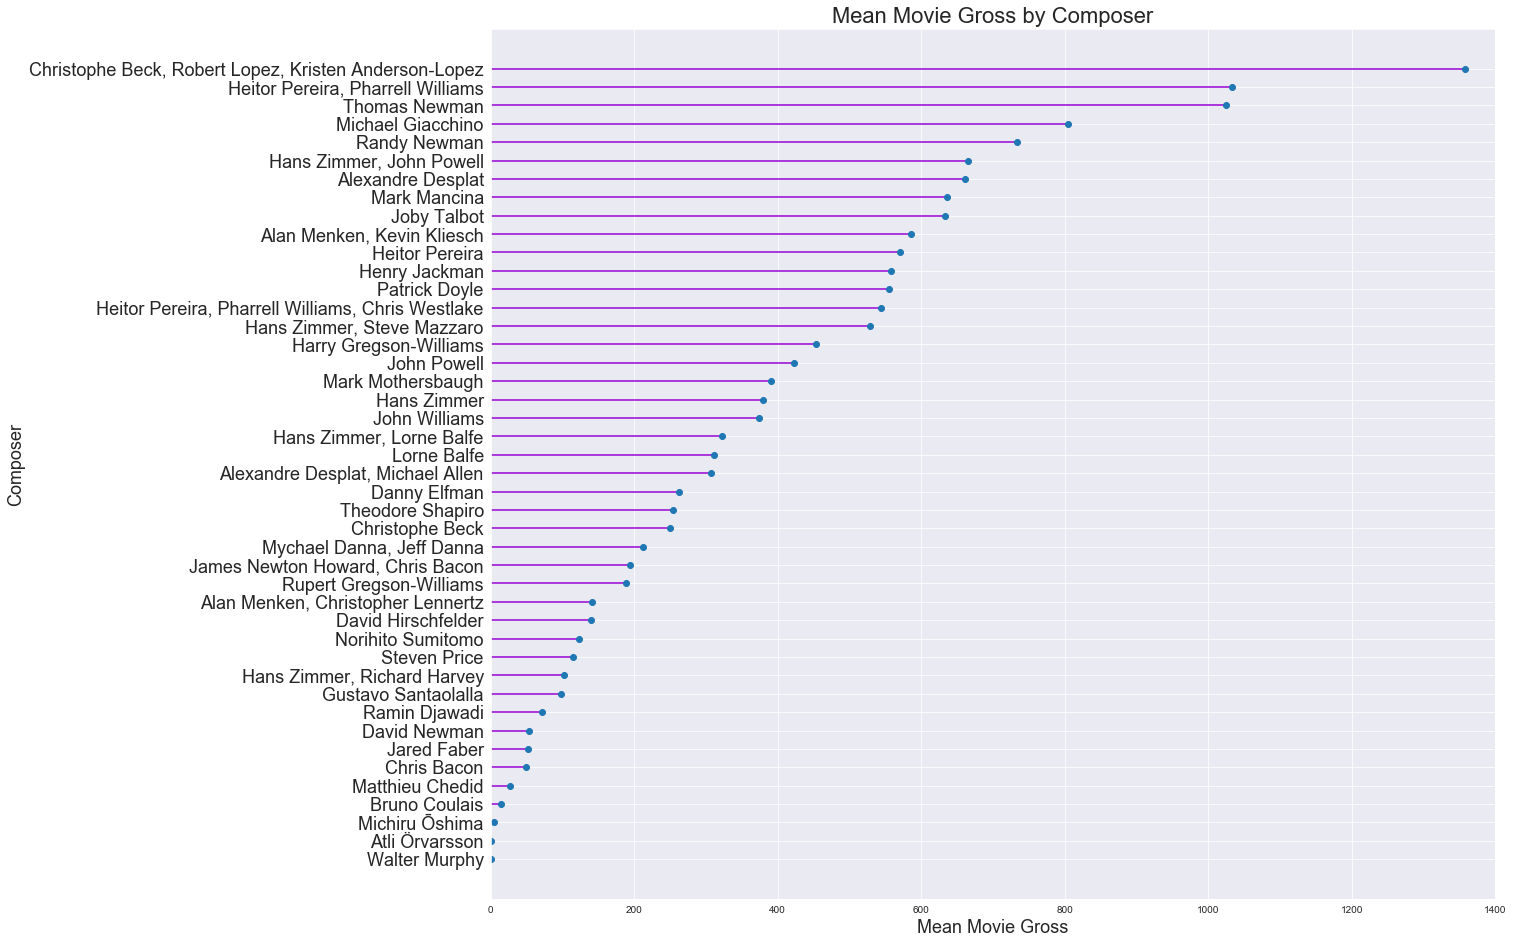

In [2086]:
plt.figure(figsize=(18, 16))
ordered_df2 = composer_stats.sort_values(by='mean')
my_range=range(1,len(composer_stats.index)+1)
plt.hlines(y=my_range, xmin=0, xmax=ordered_df2['mean'], color='darkviolet')
plt.plot(ordered_df2['mean'], my_range, "o")
plt.yticks(my_range, ordered_df2['composer'], fontsize=18)
plt.title("Mean Movie Gross by Composer", fontsize=22)
plt.xlabel('Mean Movie Gross', fontsize=18)
plt.ylabel('Composer', fontsize=18)
plt.xlim(0, 1400);

As both the composer_stats DataFrame and the Mean Movie Gross by Composer plot show, for the past ten years, the top five composers (or combinations of composers) for animated movies by mean world gross are:
1. Christophe Beck, Robert Lopez, Kristen Anderson-Lopez
2. Heitor Pereira, Pharrell Williams
3. Thomas Newman
4. Michael Giacchino
5. Randy Newman  
  
These composers have a proven track record of success and should be hired to work on an animated musical to increase box office success.

## Evaluation

Microsoft's ticket to worldwide box office success can be attained by releasing a Super Hero movie in April or May, or by releasing an animated children's musical movie in November. My findings have shown that the more funds a studio invests in their movie production, the more money (worldwide box office gross) they are likely to receive as a result. Though there are some outliers, the majority of high-grossing movies for these particular types of movies are ones with higher budgets.  Throughout my analysis, I have found that the optimal time to release a movie depends on the type of movie that it is. While animated musical movies tend to fare very well in November, super hero movies have seen immense box office success in April and May. I chose to investigate a bit further and narrow down some additional attributes that may increase a movie's value, such as the highest-grossing composers and directors for the past ten years, based on mean world gross.

I am confident that the results I extrapolated from this analysis would generalize beyond the data that I have, with the exception of this year and next year due to the COVID-19 pandemic. By looking at the data up until this year, the trends and correlations I found were true for the past ten years, so I am confident that they will again be true once the world returns to some semblance of normalcy. 

If the recommendations that I made are put to use, I am confident that Microsoft will have a successful break into the movie-making industry. From the data, it is clear that all the attributes I have discussed are correlated with high worldwide box office gross, which is exactly what Microsoft will want for their first movies and beyond.

## Conclusion

In conclusion, I would recommend that Microsoft allocate the maximum possible amount of funds for production budget in order to achieve the highest worldwide box office gross. The movie should either be:
* An animated musical, released in the month of November, containing songs composed by a high-grossing composer with a track record of successful work in digital animation movies, such as Christophe Beck, Robert Lopez, and Kristen Anderson-Lopez, or
* A super hero movie, released in the month of April or May, directed by a top-grossing director with a history of proven successful superhero movies, such as Anthony Russo, Joe Russo, or Joss Whedon.

While the past ten years of data show that this should be a good recipe for success, one limitation is that we are currently in a global pandemic, which has negatively affected many facets of the global economy. The visualizations above displaying movie gross over time clearly show a significant drop in movie gross for this year (2020). However, since movies take quite a bit of time to produce, the expectation is that the market will be trending in the right direction by the time a future movie would be released.

In the future, this analysis could be improved by adding additional data as it becomes available. It could also be expanded upon by determining how much money there is to be made on a streaming platform movie release while theaters remain at low audience capacity. 